## Part 1: Import Libraries and the Dataset

In [1]:
# Standard data analysis and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600 # set the resolution of output plots to 600 dpi

# Standard machine learning libraries and modules
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

dataset = pd.read_csv("king_country_houses_aa.csv")
df = dataset.copy() # create a local copy to avoid messing up the original dataset 

## Part 2: Exploratory Data Analysis

In [2]:
# Custom function to view the data type of each column, shape of data, and a random selection of 5 rows
def view_data(data): # returns shape, data types & shows a small sample
    print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")
    print(data.dtypes, "\n")
    print("Data row sample and full columns:")
    return data.sample(5)

# Custom function to detect empty spaces, duplicated rows, and nan values
def check_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicated_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {duplicated_rows} duplicated rows.")
    return exploration

View the data types and a random selection of 5 rows:

In [3]:
view_data(df)

Dataset has 21613 rows and 21 columns.

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object 

Data row sample and full columns:


id             date     price  bedrooms  bathrooms  \
5639   7224000980  20140610T000000  100000.0         4       1.00   
21581  7853420110  20150504T000000  625000.0         3       3.00   
10667  6662000070  20140514T000000  715000.0         4       2.25   
11538  9324300030  20140703T000000  264500.0         4       2.25   
7119   1148000005  20140623T000000  346000.0         3       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
5639          1120      2685     1.0           0     0  ...      5   
21581         2780      6000     2.0           0     0  ...      9   
10667         2060      5649     1.0           0     0  ...      8   
11538         2060     11385     1.0           0     0  ...      7   
7119          1270      8100     1.0           0     0  ...      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
5639          860            260      1939             0    98055  47.4904   
21581        2780              0      2013             0    98065  47.5184   
10667        1360            700      1941             0    98199  47.6496   
11538        1200            860      1962             0    98023  47.3140   
7119          880            390      1950             0    98146  47.4828   

          long  sqft_living15  sqft_lot15  
5639  -122.203           1120        4838  
21581 -121.886           2850        6000  
10667 -122.407           2060        5626  
11538 -122.363           2110       11385  
7119  -122.344           1650        8173  

[5 rows x 21 columns]

Check for empty spaces, nan values, and duplicated rows:

In [4]:
check_data(df)

There are 0 duplicated rows.


NaN  EmptySpaces
id               0            0
date             0            0
price            0            0
bedrooms         0            0
bathrooms        0            0
sqft_living      0            0
sqft_lot         0            0
floors           0            0
waterfront       0            0
view             0            0
condition        0            0
grade            0            0
sqft_above       0            0
sqft_basement    0            0
yr_built         0            0
yr_renovated     0            0
zipcode          0            0
lat              0            0
long             0            0
sqft_living15    0            0
sqft_lot15       0            0

The dataset is clean. There are no empty spaces, no nan values, and no duplicated rows. 

## Part 3: Implement Machine Learning (ML) Models

### 3.0: Format `date` as a datetime object 

Before moving forward, we notice that `date` column in the dataset is badly formatted. This will be fixed by reformatting it as a `datetime` object:

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

Check `date` after transformation:

In [6]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

### 3.1 Define custom function for implementing ML models

In [7]:
def ml_model_runner(title, models, data, features):
    print(f"Implementing models for {title}:\n")

    X = data[features]
    y = data['price']

    # Splitting the dataset into training and testing sets (80/20 rule)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            "MAE": mae,
            "RMSE": rmse,
            "R²": r2
        }

    # Sorting the results by MAE, RMSE, and R²
    sorted_results = sorted(results.items(), key=lambda x: (x[1]['MAE'], x[1]['RMSE'], -x[1]['R²']))

    # Displaying the sorted results
    for model_name, metrics in sorted_results:
        print(f"{model_name}:")
        print(f"  MAE: {metrics['MAE']}")
        print(f"  RMSE: {metrics['RMSE']}")
        print(f"  R²: {metrics['R²']}")
        print()

    # Plotting the metrics
    model_names = [x[0] for x in sorted_results]
    mae_values = [x[1]['MAE'] for x in sorted_results]
    rmse_values = [x[1]['RMSE'] for x in sorted_results]
    r2_values = [x[1]['R²'] for x in sorted_results]

    x = np.arange(len(model_names))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot MAE and RMSE bars
    ax.bar(x - width/2, mae_values, width, label='MAE', color='#87CEEB', edgecolor='black', linewidth=1.2, alpha=0.9)
    ax.bar(x + width/2, rmse_values, width, label='RMSE', color='#1D2951', edgecolor='black', linewidth=1.2, alpha=0.9)


    # Add R² values as text on top of each bar pair
    for i, (mae, rmse, r2) in enumerate(zip(mae_values, rmse_values, r2_values)):
        ax.text(i, rmse + 0.01 * max(rmse_values), f'R²: {r2:.3f}', 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

 
    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_xlabel('Models')
    ax.set_ylabel('MAE / RMSE')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend(loc='upper left')

    fig.tight_layout()
    plt.show()

# Example usage:
# models = {
#     'Linear Regression': LinearRegression(),
#     'Random Forest': RandomForestRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor()
# }
# ml_model_runner("baseline", models, data, ['feature1', 'feature2', 'feature3', ...])

The target (dependent variable) is `price` and all or a subset of other columns are features (independent variables).

### 3.2 Baseline case

As an elementary practice for a baseline scenario, we select all columns except `price` and `date` as the feature set:

Implementing models for baseline case:



C:\Users\ZhouZhou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.059e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Random Forest:
  MAE: 72993.67461355284
  RMSE: 147038.96952764972
  R²: 0.8569855221945898

kNN:
  MAE: 95186.19292158223
  RMSE: 181079.30912062532
  R²: 0.7831033913749119

Extrem Gradient Boost:
  MAE: 100403.43458680315
  RMSE: 188628.85097772986
  R²: 0.7646407115884023

Decision Tree:
  MAE: 105911.20356234096
  RMSE: 218410.42316514303
  R²: 0.6844546211183179

Ridge Regression:
  MAE: 127472.15165494489
  RMSE: 212520.7714414938
  R²: 0.7012431503514247

Lasso Regression:
  MAE: 127474.08875619728
  RMSE: 212520.25016490792
  R²: 0.7012446159470795

Linear Regression:
  MAE: 127474.10296303834
  RMSE: 212520.15852830824
  R²: 0.7012448735876724



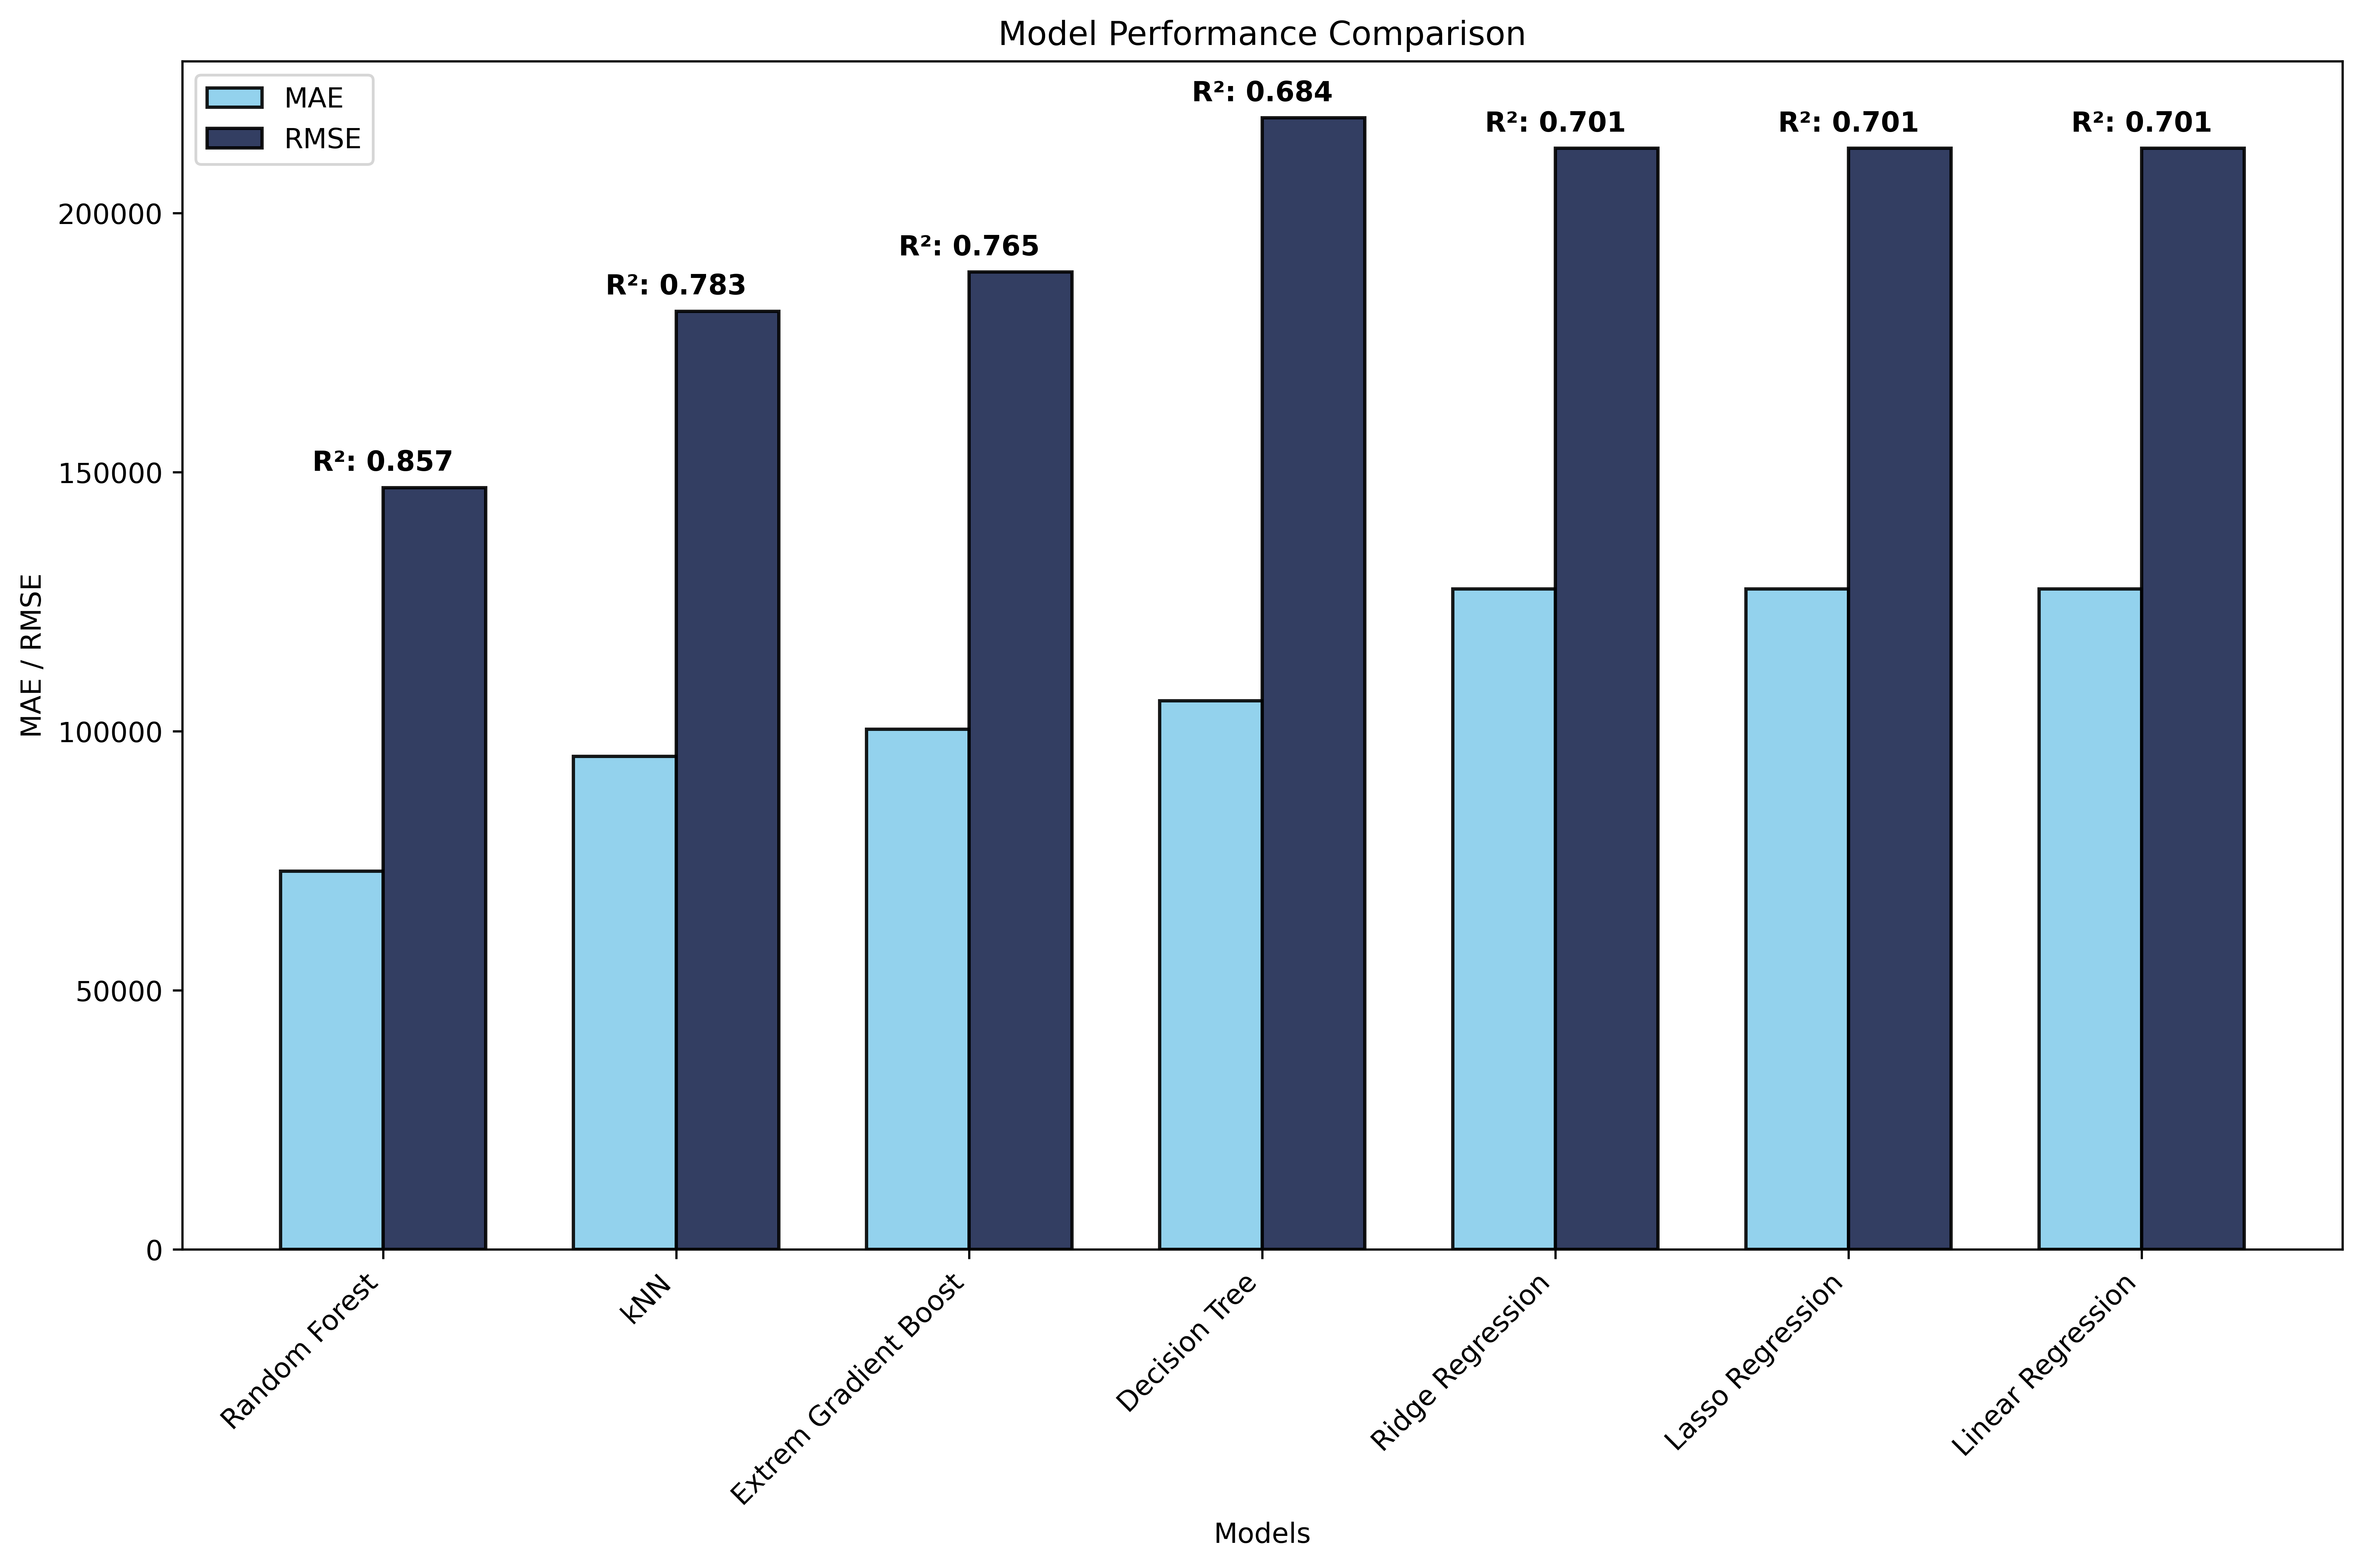

In [8]:
title = "baseline case"

# Create a dictionary where the keys are model names and the values are their corresponding function calls
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "kNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extrem Gradient Boost": xgb.XGBRFRegressor()
    }

# Select the features
features = [col for col in df.columns if col not in ['price', 'date']] # drop date since it's not a number

# Call ml_model_runner()
ml_model_runner(title, models, df, features)

The ML models are sorted from left to right by lowest MAE and RMSE (indicating better accuracy) and highest R² (signifying a better fit).

Looking closely at the baseline case, we are getting "ConvergenceWarning" which may indicate any of the following issues:
1. **Insufficient Iterations:** The default number of iterations (`max_iter`) might be too low for the algorithm to converge.
2. **Poorly Scaled Features:** If the features are not properly scaled, the optimization process can struggle to converge.
3. **High Regularization:** If regularization is too high, the model might struggle to find a solution that fits the data well.

Here are several approaches we can explore to resolve this issue:

1. **Increase the number of iterations**
    - For models like `LogisticRegression`, `SGDRegressor`, or `Ridge`, we can increase `max_iter` parameter to allow the algorithm more time to converge.<br />
       Example usage: 
       `model = LogisticRegression(max_iter=1000)`
2. **Scale the Features** 
    - This step has already been implemented.
3. **Adjust Regularization**
    - For regularized models (e.g., `Ridge`, `Lasso`, or `LogisticRegression`), we may try reducing the regularization strength (`C` or `alpha`). <br />
       Example usage: 
       `model = Ridge(alpha=0.1)`
4. **Use a different solver**
    - Some solvers are better suited for certain types of data. For example, in `LogisticRegression`, we can try using the `lbfgs`, `liblinear`, or `sag` solver. <br />
       Example usage: 
       `model = LogisticRegression(solver='lbfgs', max_iter=1000)`
5. **Check for Multicollinearity**
    - If our features are highly correlated, it can cause convergence issues. We can check for multicollinearity using a correlation matrix or variance inflation factor (VIF).

### 3.3 Feature Engineering 1

For this section, we transform the dataset and run models based on the following criteria:
1. Removing column collinearity
2. Removing the outliers
3. Removing insignificant columns
4. Adding new meaningful features
5. Running the models on transformed data 

**Step 1: Remove column collinearity**<br /><br />
Use Heatmap to identify and remove highly correlated features (above 0.70)

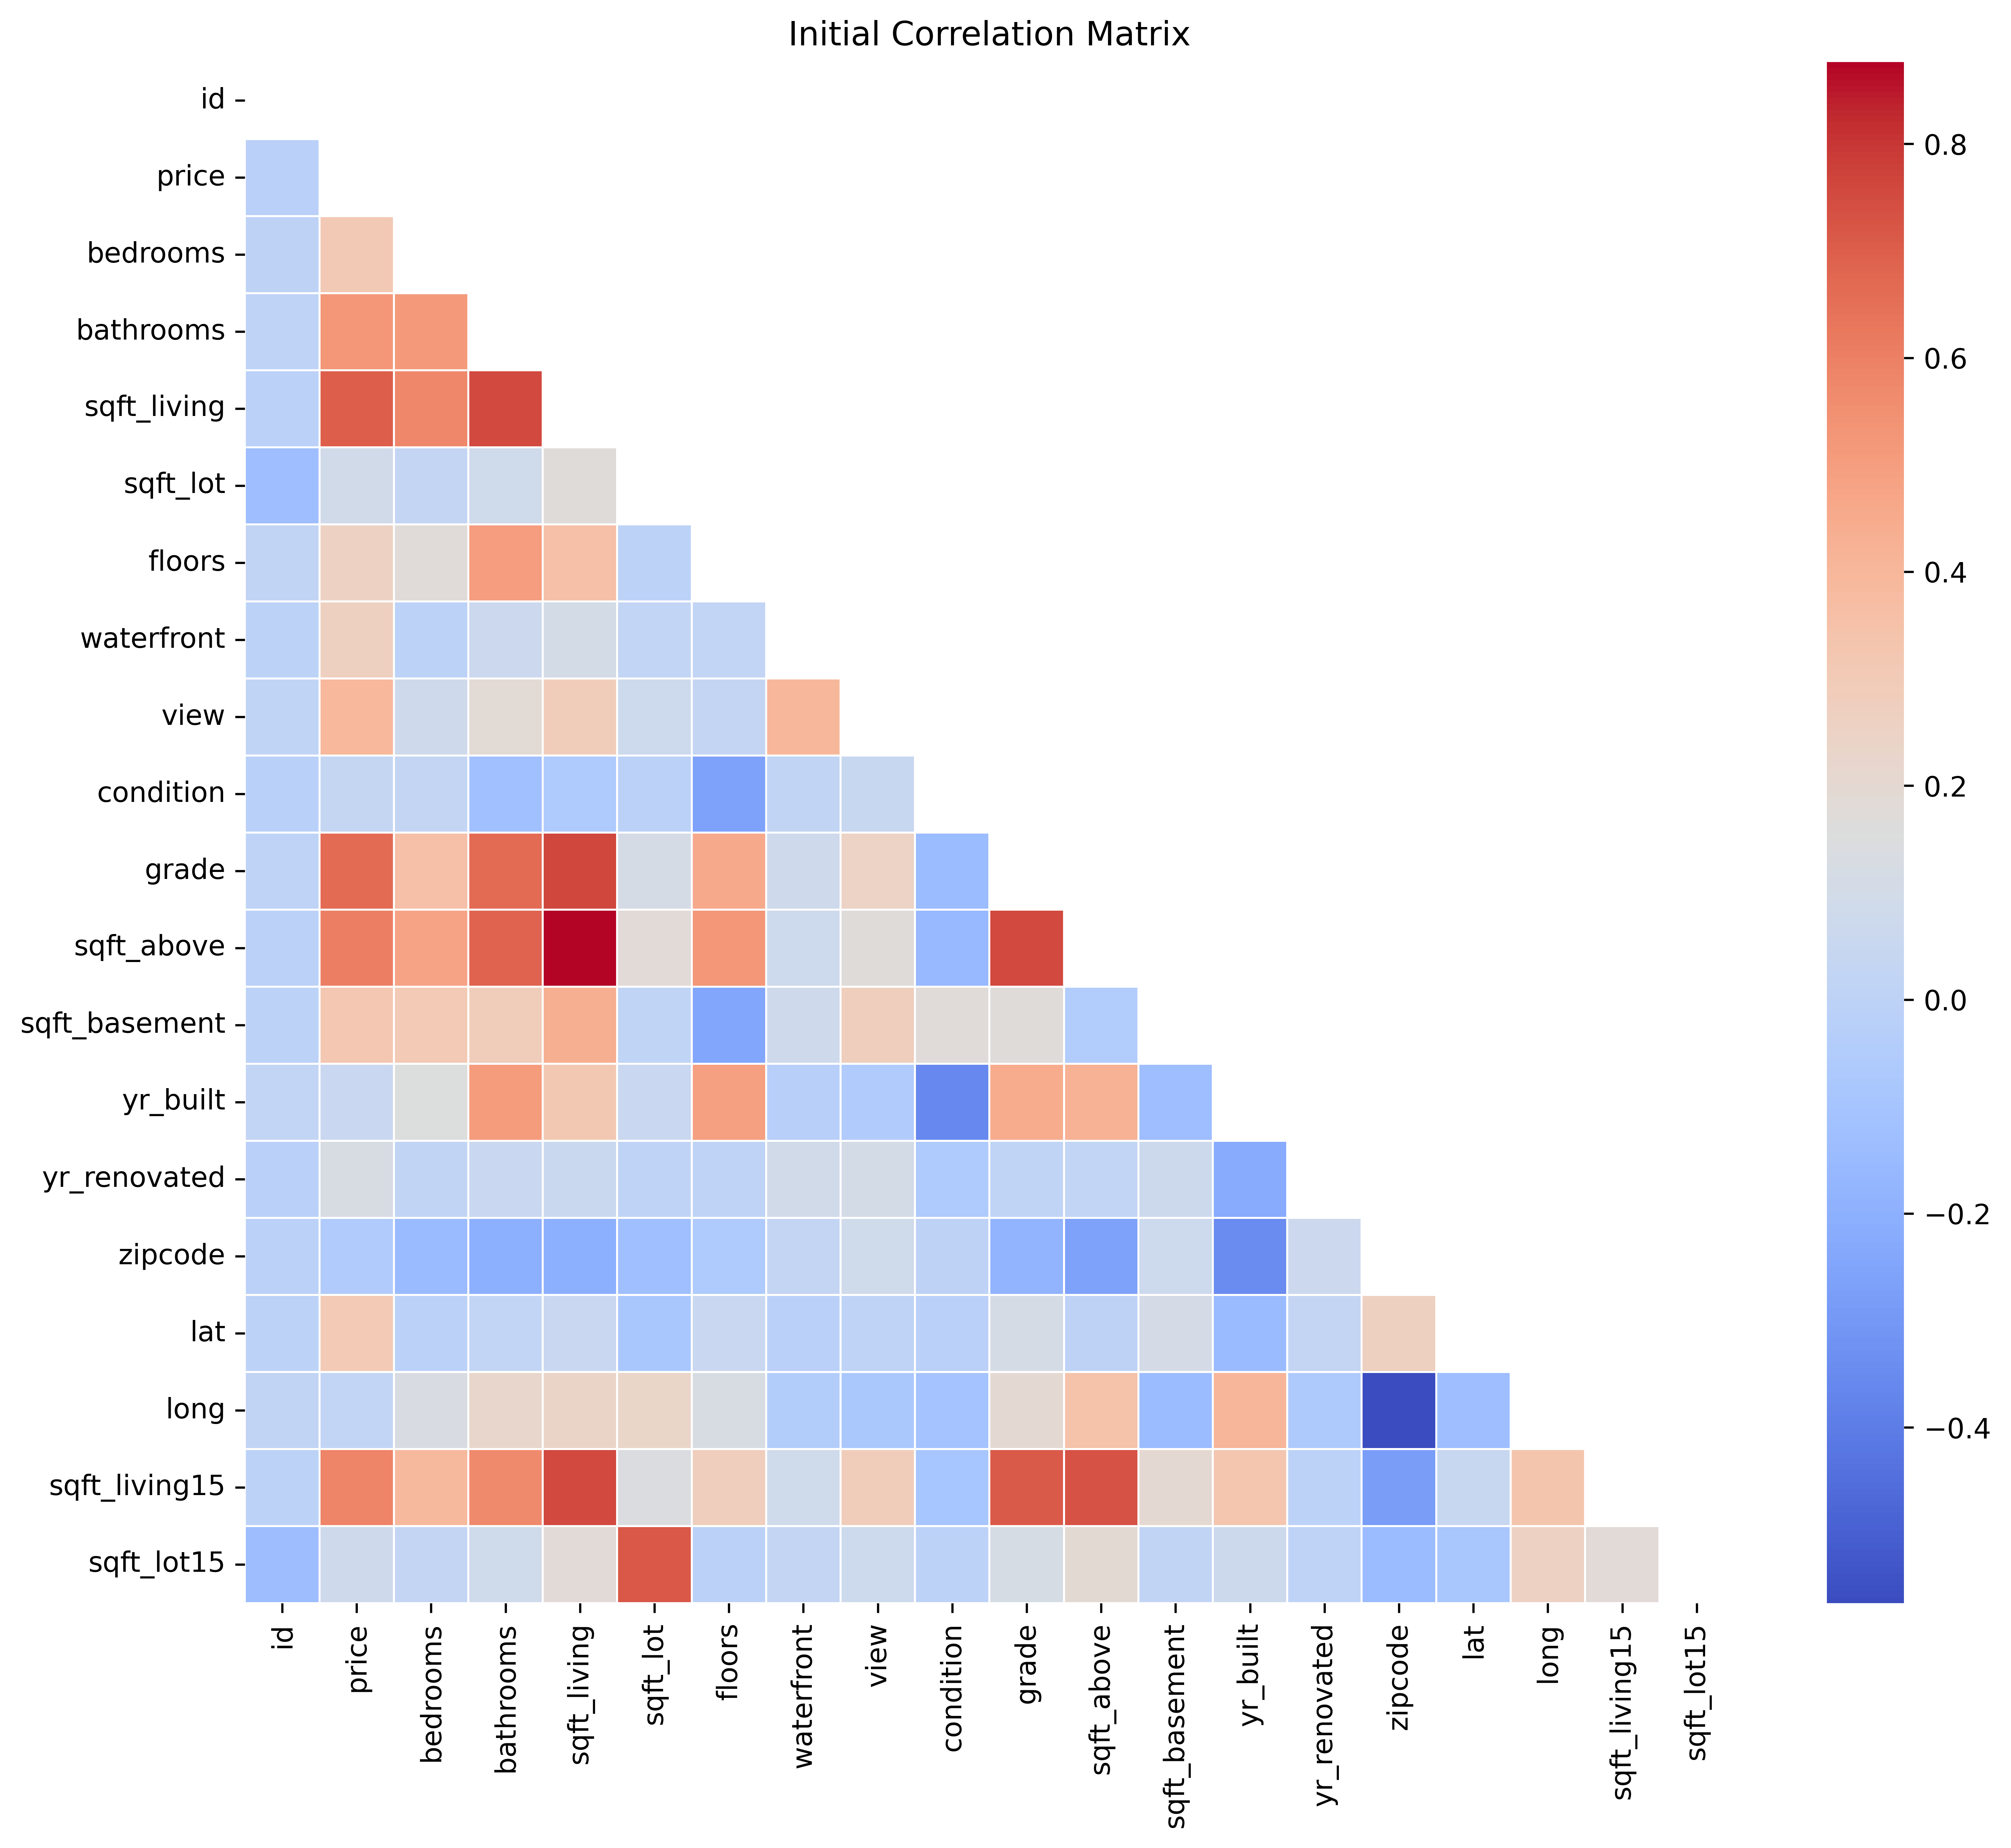

Removing column: sqft_living due to high correlation.
Removing column: sqft_above due to high correlation.
Removing column: sqft_living15 due to high correlation.
Removing column: sqft_lot15 due to high correlation.


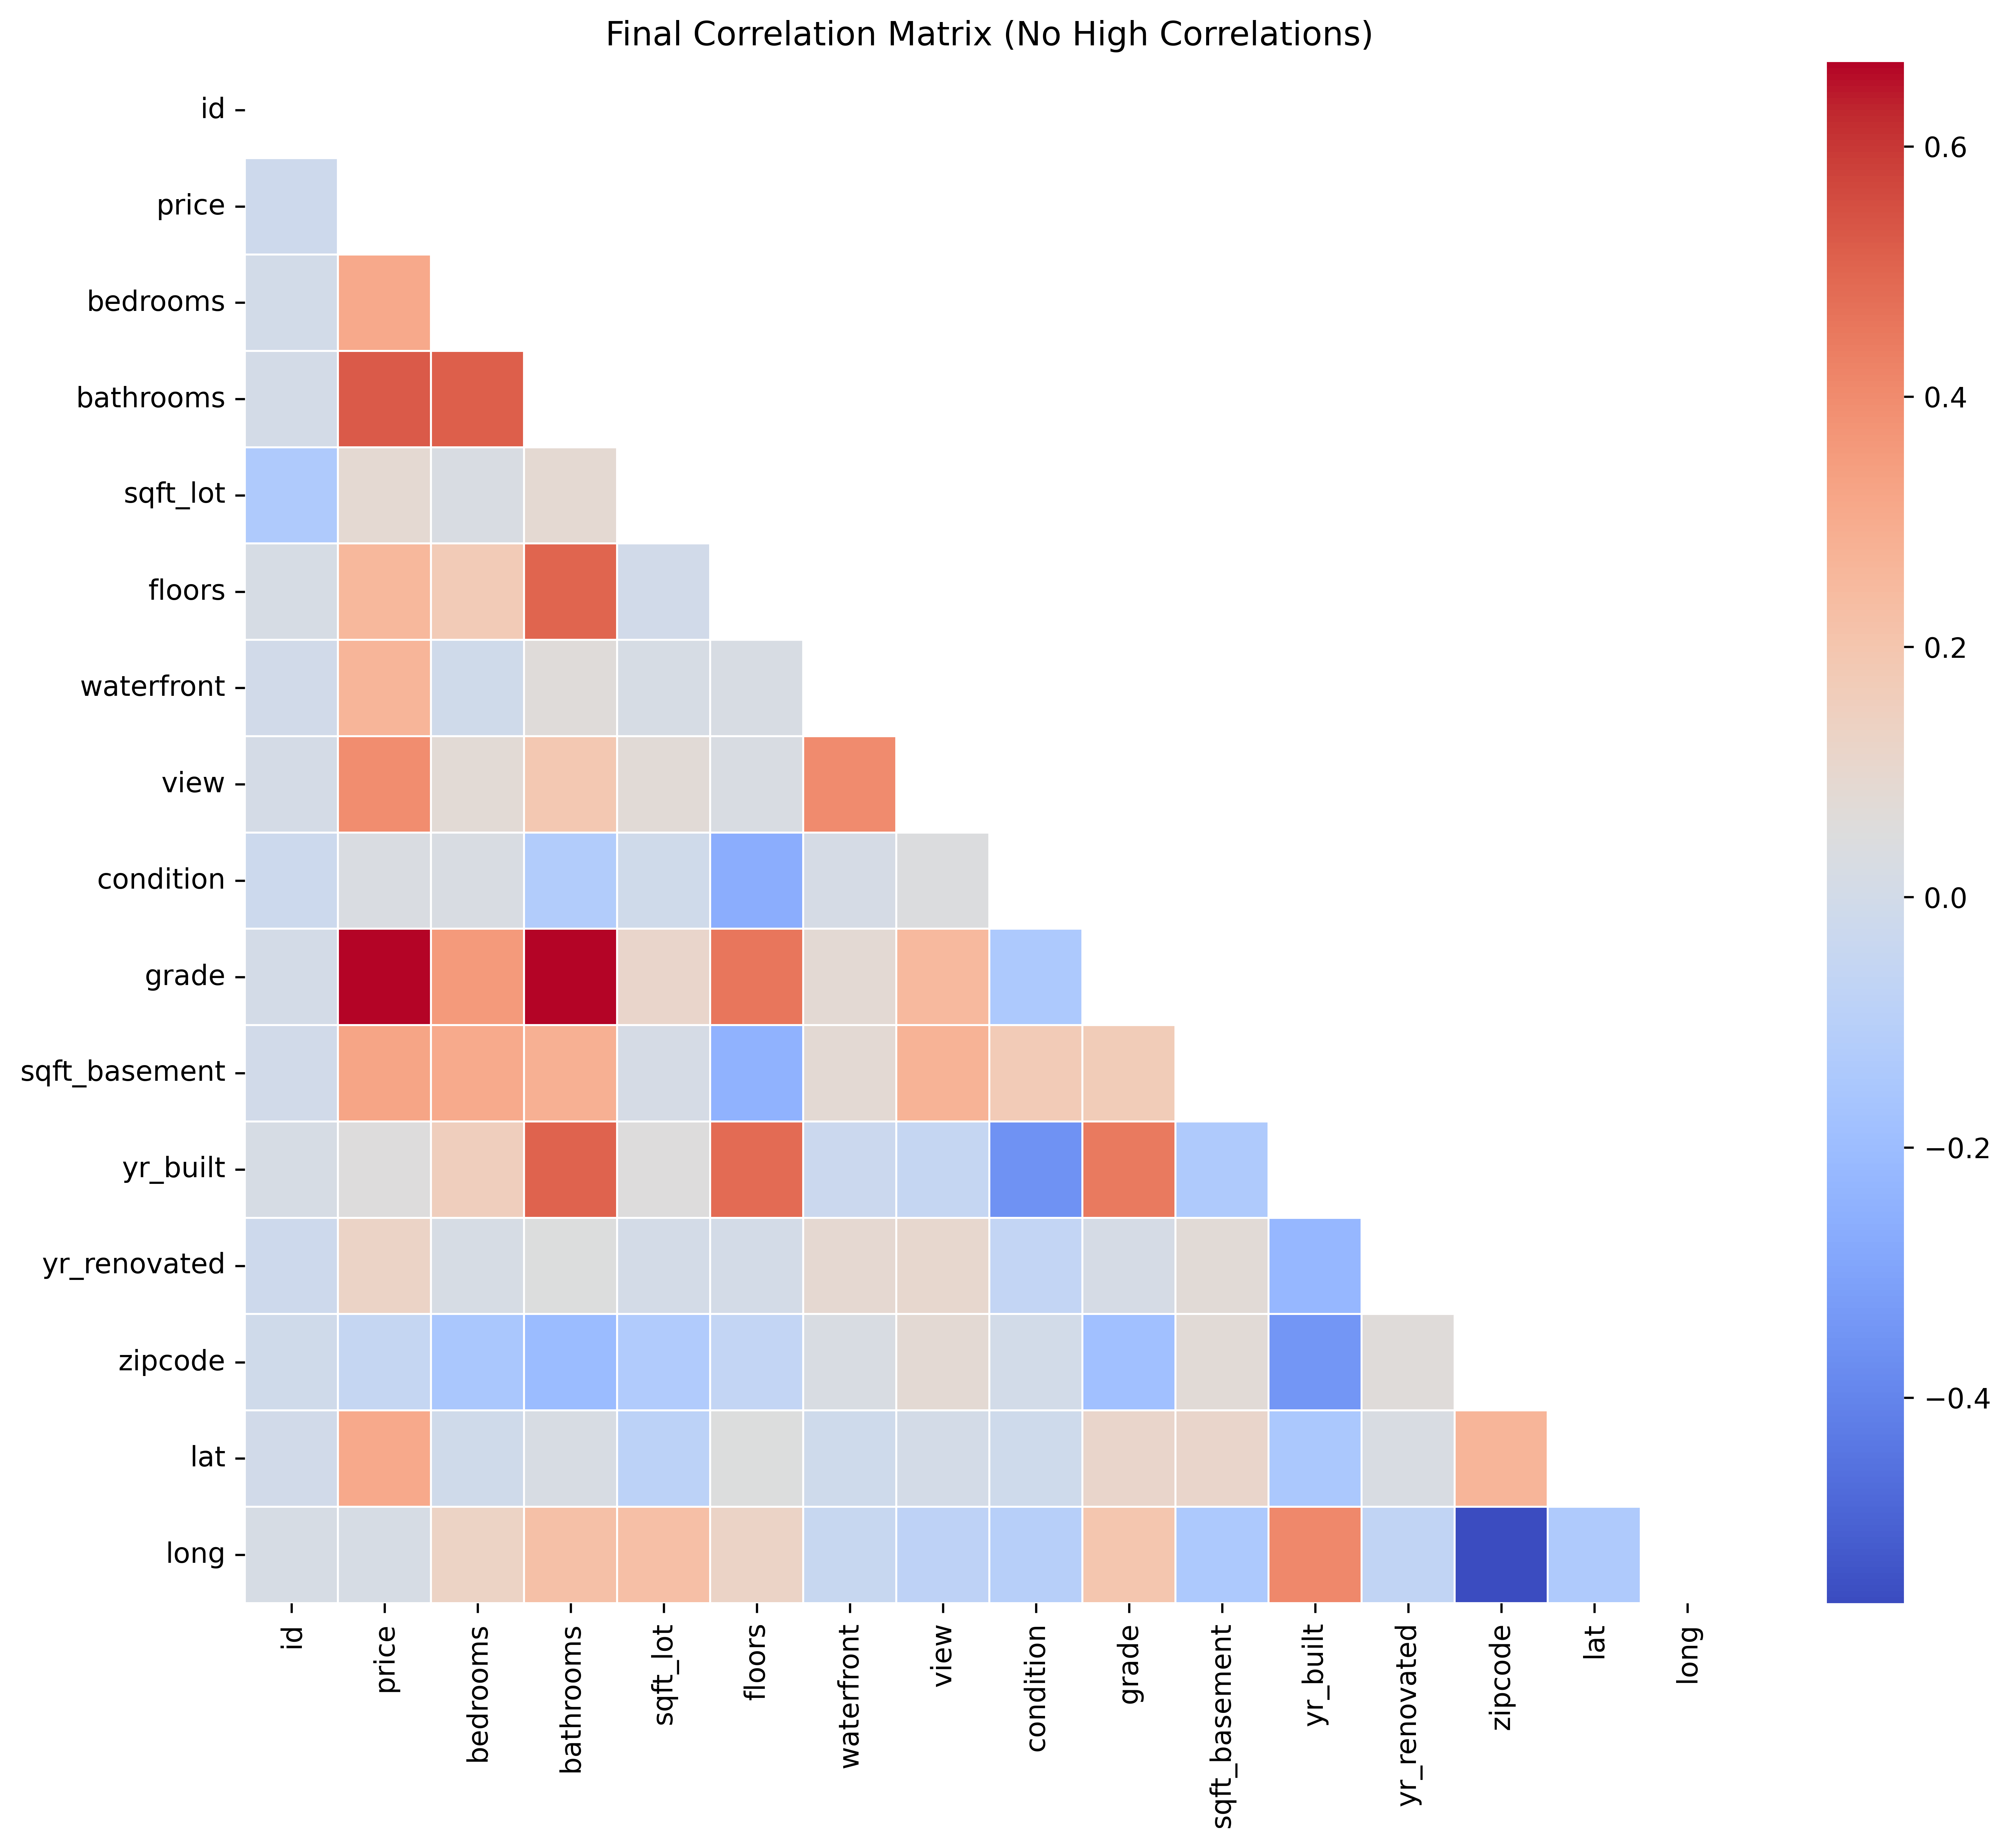

In [9]:
# Select numeric features
numeric_df = df.select_dtypes(include=[np.number])

# Function to plot the heatmap
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=0) # Mask for upper triangle + diagonal
    sns.heatmap(corr_matrix, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()

# Function to remove highly correlated features
def remove_highly_correlated_features(numeric_df, threshold=0.70):
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr(numeric_only=True)
    
    # Plot initial heatmap
    plot_heatmap(corr_matrix, 'Initial Correlation Matrix')

    # Select the upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Iterate over columns to find pairs with correlation greater than the threshold
    while True:
        # Find index of feature columns with correlation greater than the threshold
        to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
        
        if not to_drop:
            break
        
        # Drop the first column found with high correlation
        col_to_remove = to_drop[0]
        print(f"Removing column: {col_to_remove} due to high correlation.")
        numeric_df = numeric_df.drop(columns=[col_to_remove])
        
        # Recalculate the correlation matrix
        corr_matrix = numeric_df.corr(numeric_only=True)
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Plot final heatmap
    plot_heatmap(corr_matrix, 'Final Correlation Matrix (No High Correlations)')
    
    return numeric_df

df = remove_highly_correlated_features(df)

**Step 2: Remove the outliers**<br /><br />
Apply a custom function to remove the outliers using standard quartile measures.

In [10]:
def outlier_slayer(df):
    data_clean = df.copy()  # Create a copy to avoid modifying the original DataFrame
    
    # Initialize a mask to identify rows to keep
    mask = pd.Series(True, index=data_clean.index)
    
    for column in data_clean.select_dtypes(include=[np.number]):
        Q1 = data_clean[column].quantile(0.25)
        Q3 = data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update the mask to exclude rows with outliers in this column
        mask &= (data_clean[column] >= lower_bound) & (data_clean[column] <= upper_bound)
    
    # Apply the mask to filter out rows with outliers in any column
    data_clean = data_clean[mask]
    
    return data_clean

# replace the dataframe with 
df = outlier_slayer(df)
print(f"Dataset without multicollinearity and outliers has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset without multicollinearity and outliers has 15151 rows and 17 columns.


**Step 3: Remove insignificant columns**<br /><br />
Looking at `id`, `date`, and `zipcode` columns, we cannot infer any impact from these variables on `price` without prior knowledge (e.g., knowing about the history or location of the houses, their popularity, regional prestigue,...). Therefore, it makes sense to us to exclude these columns from the dataset and then train our models.

In [11]:
df.drop(columns=["id", "date", "zipcode"], inplace=True)

**Step 4: Add new meaningful columns**<br /><br />
It's a good practice to replace the current features with new meaningful ones. Here are a few instances of such transformations:
- replace `yr_built` with `age` of the house via `df["age"] = 2014 - df["yr_built"]`.
- replace `yr_renovated` with a binary (True/False) feature answering whether the house was renovated.

In [12]:
df["age"] = 2014 - df["yr_built"]  # Compute house age
df["was_renovated"] = (df["yr_renovated"] > 0).astype(int)  # Binary feature
df.drop(columns=["yr_built", "yr_renovated"], inplace=True) # Dropped, since they have been transformed into more meaningful features

**Step 5: Run the models with transformed features**

Implementing models for engineered features:

Random Forest:
  MAE: 50761.50540080281
  RMSE: 74006.08331853803
  R²: 0.8382210094688515

Extrem Gradient Boost:
  MAE: 66402.49197356483
  RMSE: 94257.65301307593
  R²: 0.7375657437293741

kNN:
  MAE: 66787.1516991092
  RMSE: 96269.79120040296
  R²: 0.7262416716332132

Decision Tree:
  MAE: 72088.76129990102
  RMSE: 103009.79391899027
  R²: 0.6865672903576766

Linear Regression:
  MAE: 87718.09526989846
  RMSE: 116874.10844400946
  R²: 0.5965182438325733

Lasso Regression:
  MAE: 87718.18874037074
  RMSE: 116874.20480874227
  R²: 0.5965175784768642

Ridge Regression:
  MAE: 87718.1954591559
  RMSE: 116874.59512400052
  R²: 0.5965148835176336



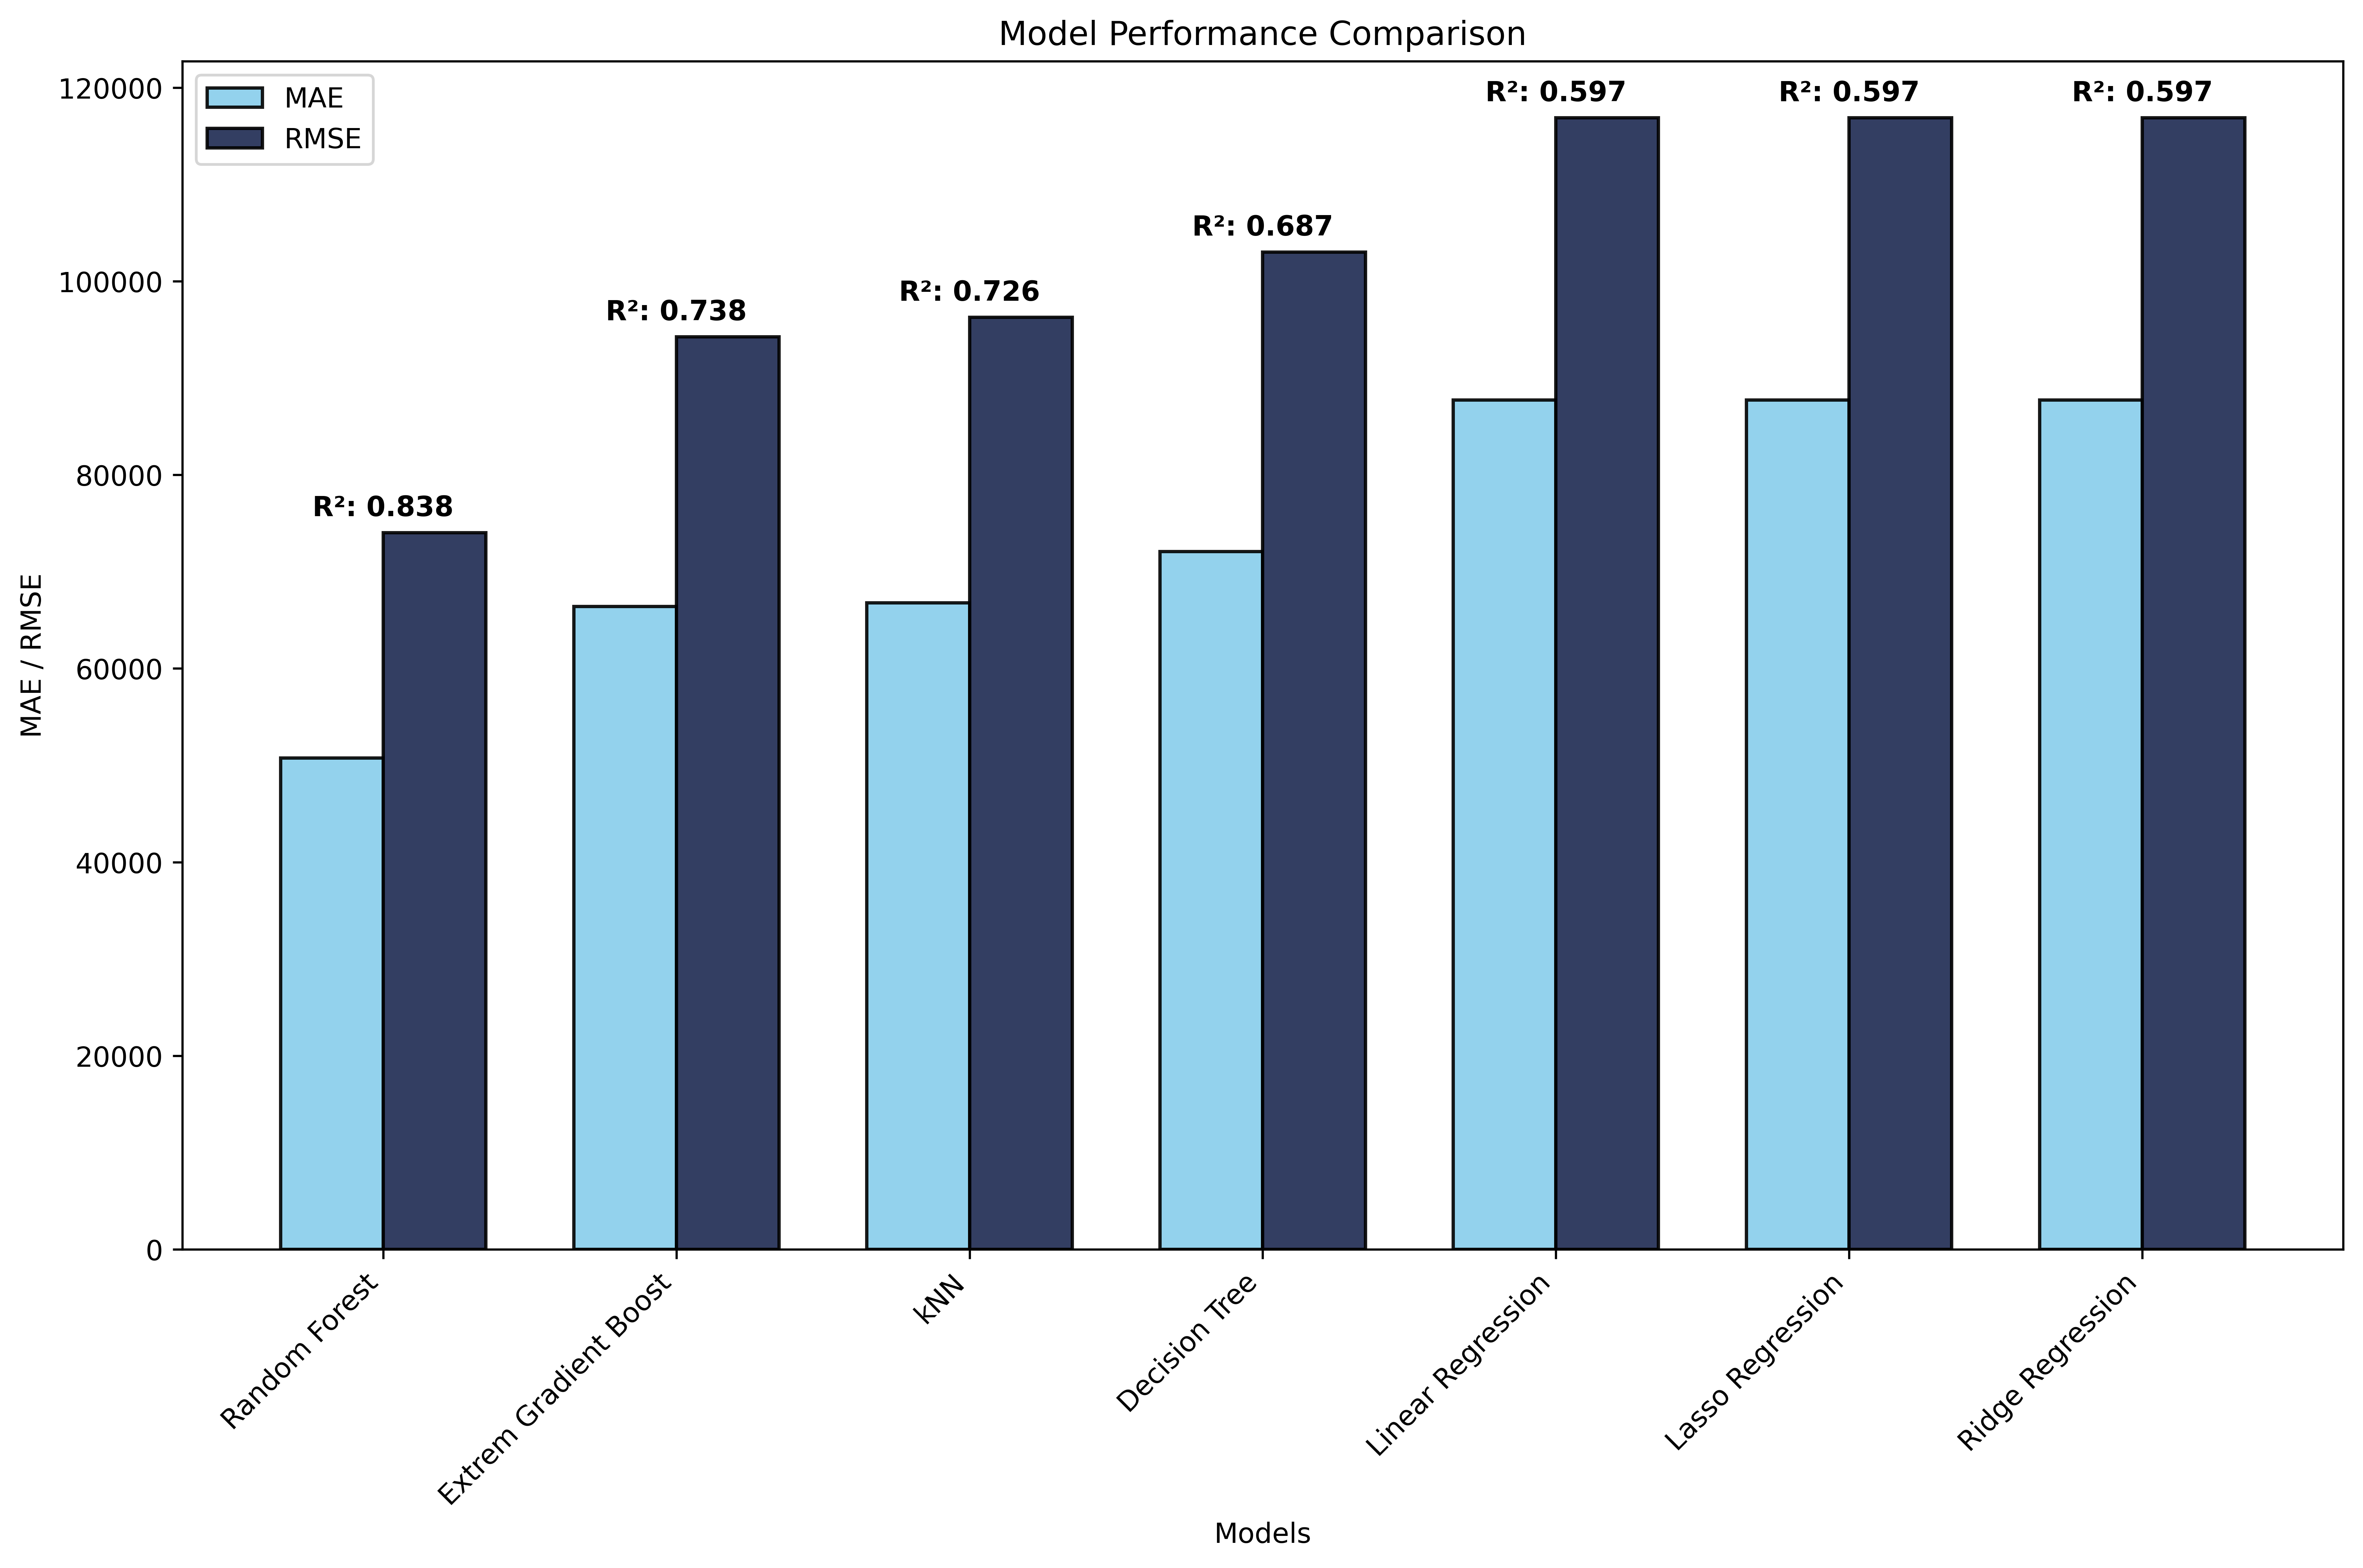

In [13]:
title = "engineered features"

# Select the features
features = [col for col in df.columns if col not in ['price']]

# Call ml_model_runner()
ml_model_runner(title, models, df, features)

As we can see, feature engineering implemeted above did not improve performance benchmark accross the models. It improved MAE and RMSE values due to the removal of outliers, but worsened R² scores (particularly for regression models). This behavior can be explained as follows: **_while removing outliers reduces the dispersion of values, it comes at a cost—diminishing the model's predictive accuracy. By eliminating a significant portion of data, we may lose valuable information that helps the model capture complex patterns during training._**

### 3.4 Feature Engineering 2

For this section, we restore the original dataset and run models based on the following criteria:
1. Selecting top 10 features based on their relative importance
2. Running the models on these features

Unlike section 3.3, we keep the outliers (whatever they are), but select a portion of features that are most important in predicting the house prices. 

**Step 0: Restore the original dataset**<br /><br />
Use `df = dataset.copy()` to restore the original data for a new set of transformations.

In [14]:
# Restore the dataset
df = dataset.copy()

**Step 1: Select top features affecting the price**<br /><br />
This can be done in 2 different ways:
1. Select top features based on correlation values with the target variable `price`.
2. Pick a predictive model (e.g. Random Forest Regressor) and apply `feature_importances_` method to determine the relative importance of each feature in the dataset. Use `.nlargest(n)` to select the top `n` most important features.

In [15]:
# Correlation between features and target variable 'price' (sorted in descending order)
corr_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(corr_with_price)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [16]:
# Select top 10 features
top_10_features = corr_with_price.index[1:11].tolist() # skipping index 0 (which is price itself)
top_10_features

['sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'view',
 'sqft_basement',
 'bedrooms',
 'lat',
 'waterfront']

**Step 2: Run the models for top 10 features**

Implementing models for top 10 features:



C:\Users\ZhouZhou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.359e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Random Forest:
  MAE: 92295.048329915
  RMSE: 182113.4168957099
  R²: 0.7806190112331509

kNN:
  MAE: 105663.07462410364
  RMSE: 197512.91827215184
  R²: 0.7419486619202331

Extrem Gradient Boost:
  MAE: 110040.49581453852
  RMSE: 213526.3792445392
  R²: 0.6984091401867691

Decision Tree:
  MAE: 125256.82088056135
  RMSE: 243291.26294027182
  R²: 0.6084672186645739

Linear Regression:
  MAE: 137538.52265395786
  RMSE: 226405.556979787
  R²: 0.6609300766890919

Ridge Regression:
  MAE: 137540.00922474114
  RMSE: 226405.92692721114
  R²: 0.6609289686054487

Lasso Regression:
  MAE: 137541.38148173434
  RMSE: 226405.47847560848
  R²: 0.6609303118282072



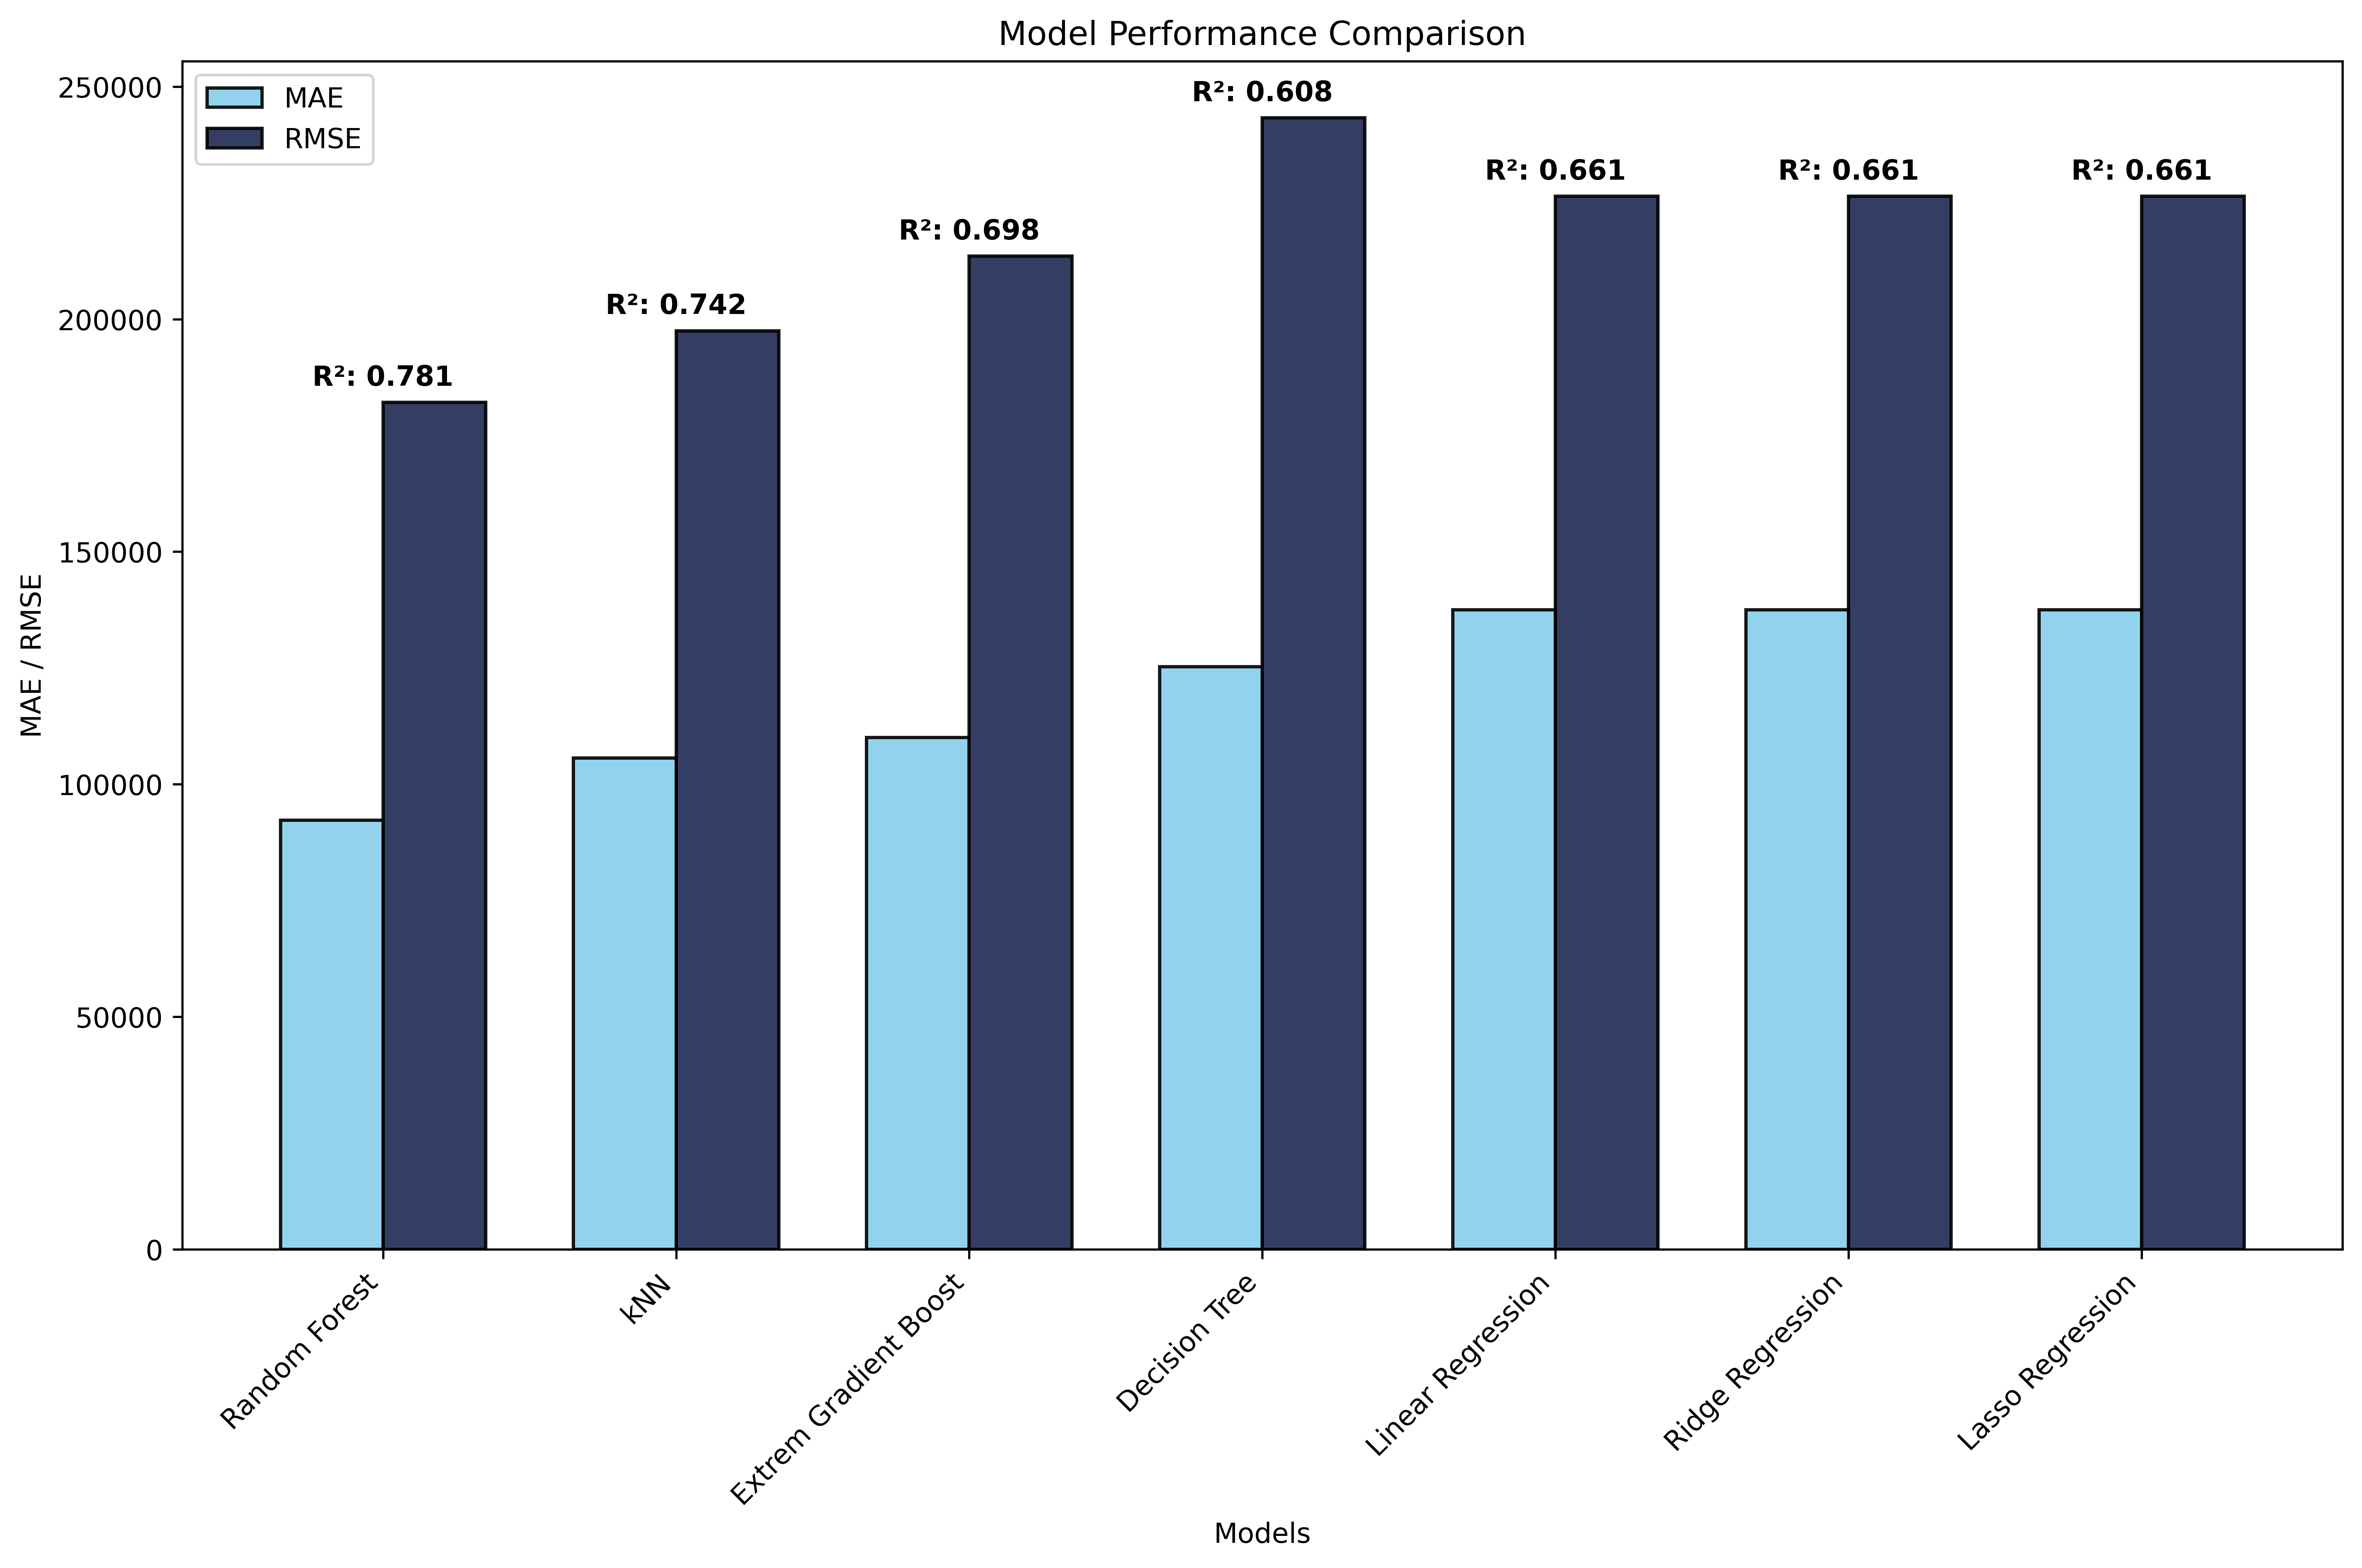

In [17]:
title = "top 10 features"

# Select the features
features = top_10_features

# Call ml_model_runner()
ml_model_runner(title, models, df, features)

We can see a slight improvement of R² scores over the feature engineering that we did in section 3.3, but keeping only the top 10 features worsened the performance of models relative to the baseline case. So far, no improvement!

### 3.5 Feature Engineering 3

For this section, we restore the original dataset and run models based on the following criteria:
1. Transforming columns as of steps 3 and 4 in section 3.3
2. Running the models on transformed features

**Step 0: Restore the original dataset**

In [18]:
# Restore the dataset
df = dataset.copy()

**Step 1: Columns transformation**<br /><br />
We maintain the transformation of columns as of steps 3 and 4 in section 3.3

In [19]:
# Feature selection and preprocessing

df.drop(columns=["id", "date"], inplace=True)
df["age"] = 2014 - df["yr_built"]  # Compute house age
df["was_renovated"] = (df["yr_renovated"] > 0).astype(int)  # Binary feature
df.drop(columns=["yr_built", "yr_renovated"], inplace=True) # Dropped, since they have been transformed into more meaningful features

**Step 2: Running the model on transformed features**

Implementing models for engineered features:



C:\Users\ZhouZhou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.060e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Random Forest:
  MAE: 73260.74504263188
  RMSE: 149027.11759366706
  R²: 0.8530919117982778

kNN:
  MAE: 93170.83715012722
  RMSE: 182452.89337272543
  R²: 0.779800355470627

Extrem Gradient Boost:
  MAE: 101430.00771671871
  RMSE: 192122.71072224376
  R²: 0.7558411251029911

Decision Tree:
  MAE: 104019.52486699051
  RMSE: 211293.52803005403
  R²: 0.7046836492148785

Linear Regression:
  MAE: 127447.4105257908
  RMSE: 212529.77129974068
  R²: 0.7012178462250461

Ridge Regression:
  MAE: 127495.00210963872
  RMSE: 212544.8312328468
  R²: 0.7011755011112804

Lasso Regression:
  MAE: 127496.93246639175
  RMSE: 212544.31258268442
  R²: 0.7011769594877073



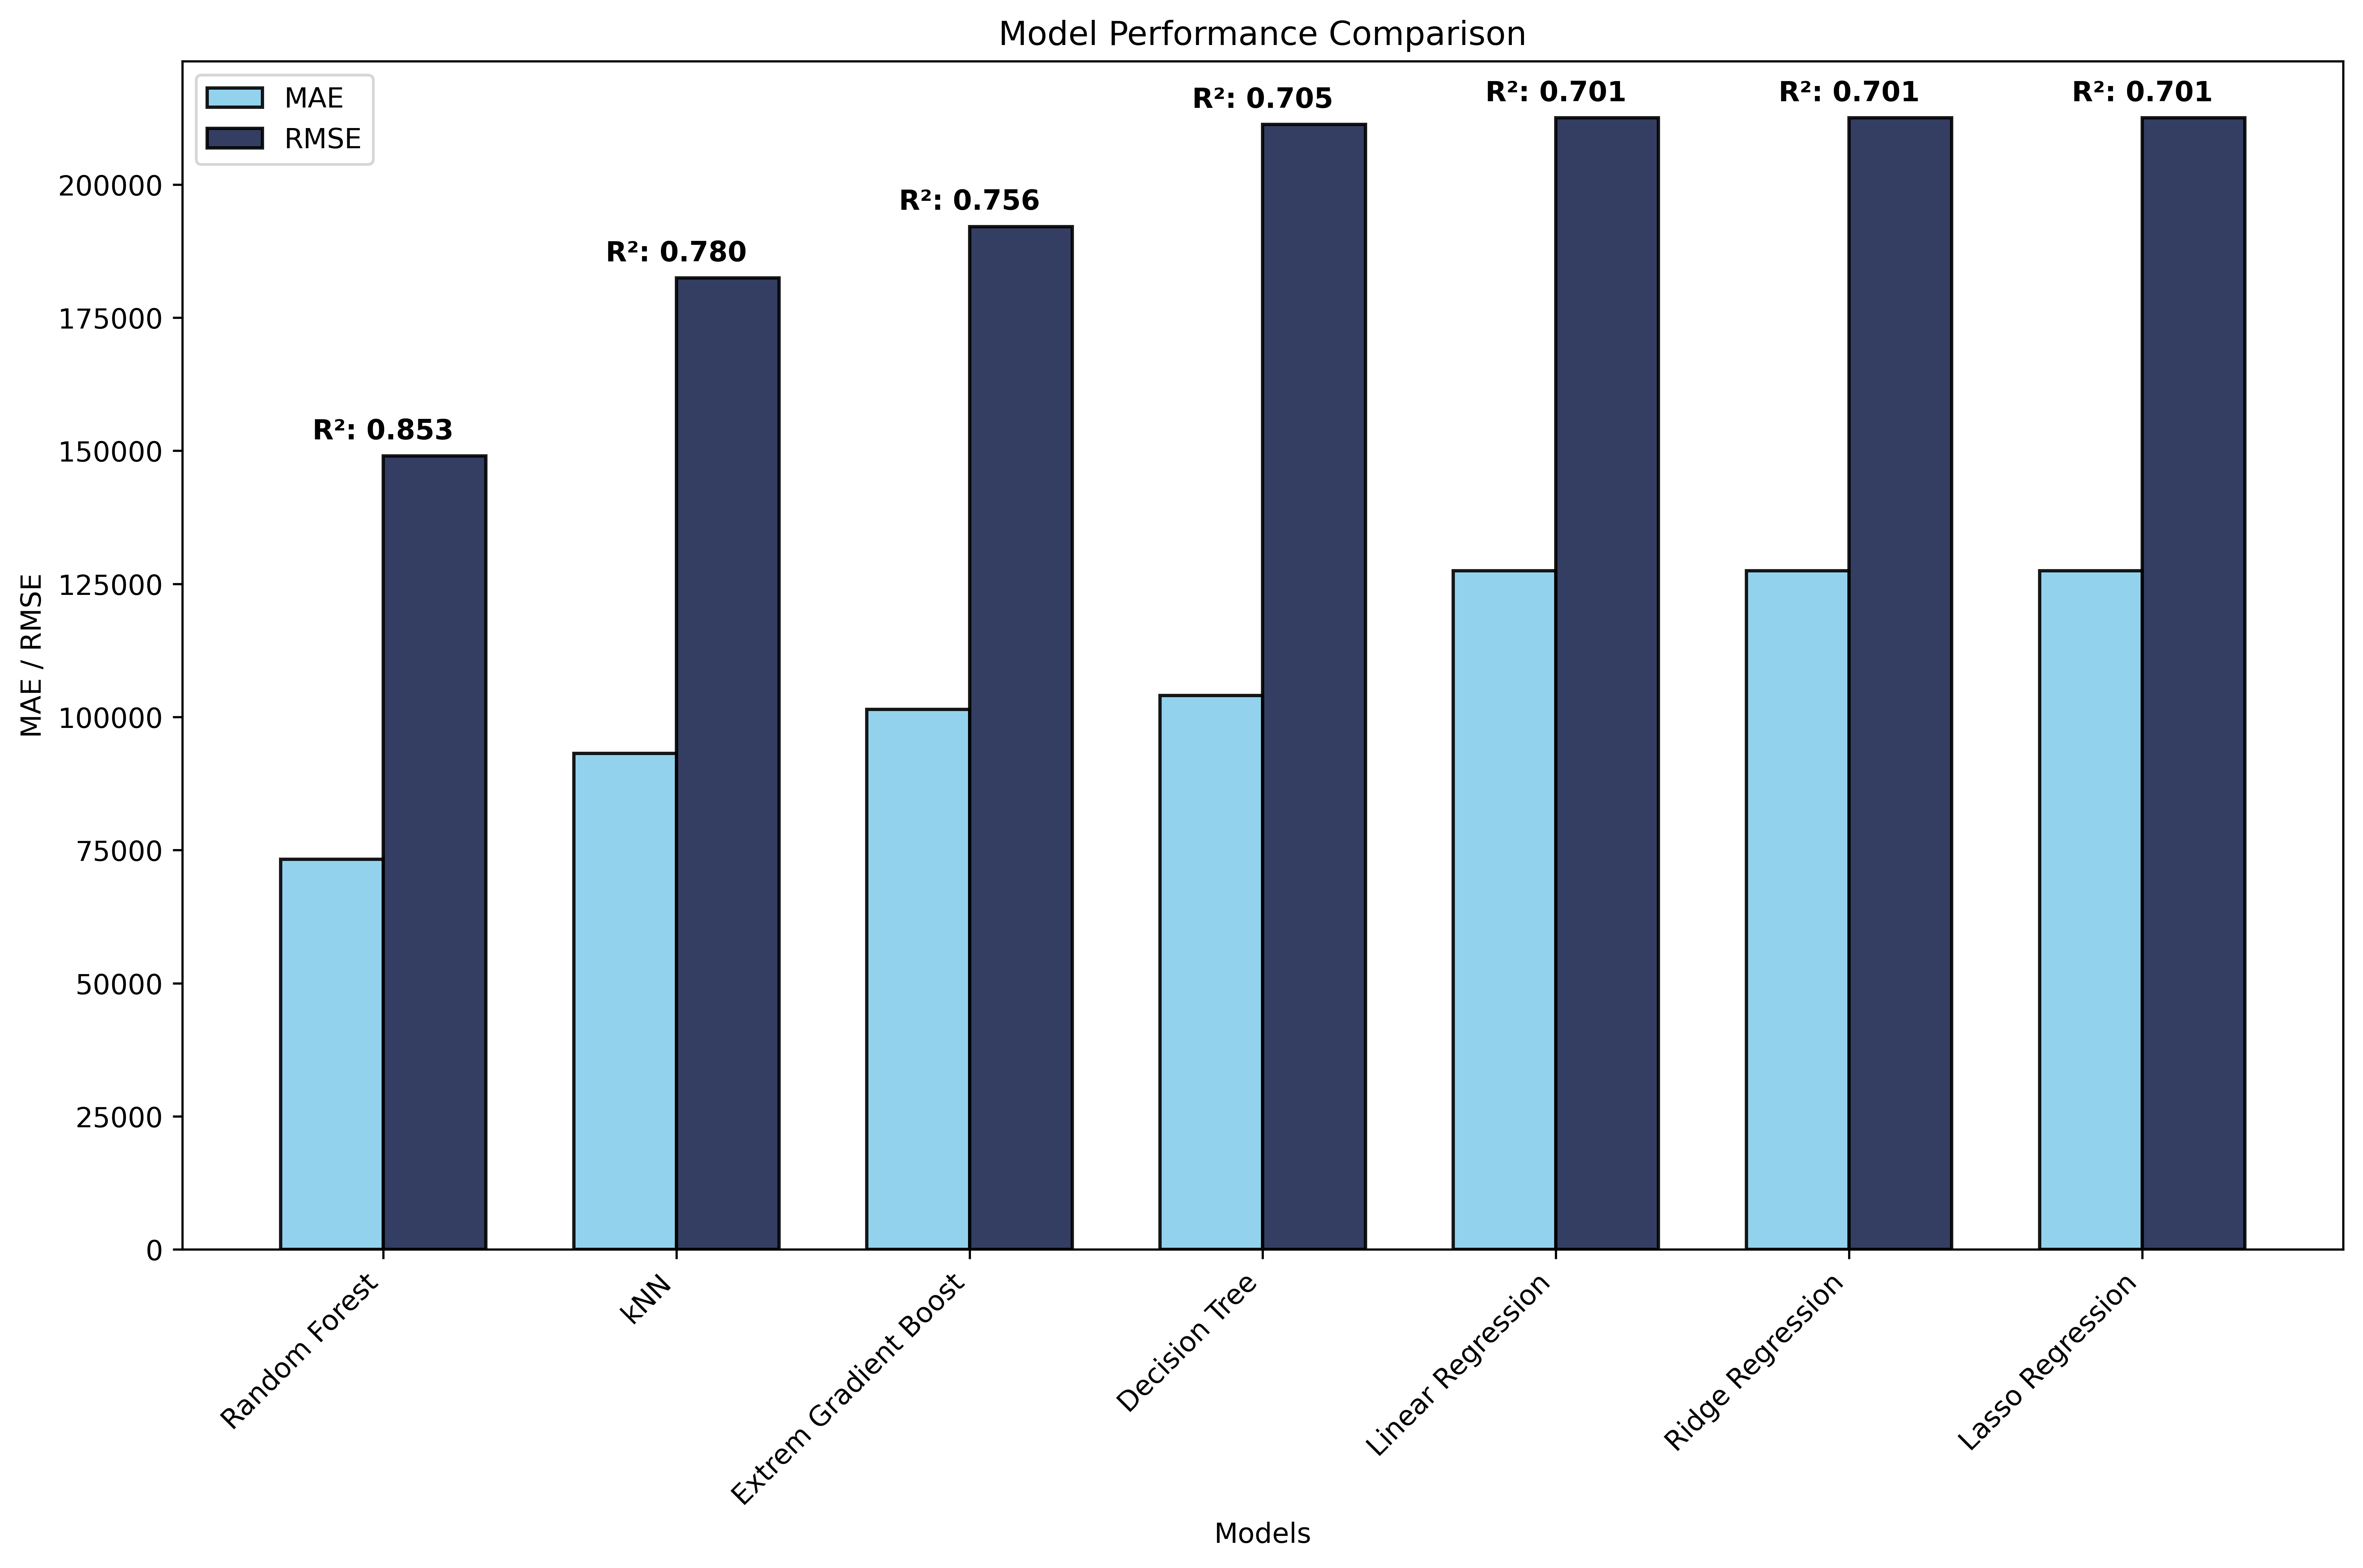

In [20]:
title = "engineered features"

# Select the features
features = [col for col in df if col not in ["price"]]

# Call ml_model_runner()
ml_model_runner(title, models, df, features)

We get more or less the same R² scores and MAE/RMSE values relative to baseline case in secion 3.2. Again no improvement!

## Part 4: Portfolio Analysis for High Valued Properties

### Summary statistics of high valued properties

In [21]:
# Portfolio Analysis for Properties Valued at $650K and Above
df = dataset.copy()

df.drop(columns=["id", "date", "zipcode"], inplace=True)
high_value_properties = df[df['price'] >= 650000]
print("High-value properties analysis:")
print(high_value_properties.describe())

High-value properties analysis:
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  5.324000e+03  5324.000000  5324.000000   5324.000000  5.324000e+03   
mean   9.906619e+05     3.824005     2.676606   3005.195718  2.127395e+04   
std    4.777454e+05     0.896912     0.792677   1028.645889  6.022981e+04   
min    6.500000e+05     0.000000     0.000000    890.000000  5.200000e+02   
25%    7.250000e+05     3.000000     2.250000   2330.000000  5.400000e+03   
50%    8.300000e+05     4.000000     2.500000   2890.000000  8.580000e+03   
75%    1.050000e+06     4.000000     3.250000   3510.000000  1.440650e+04   
max    7.700000e+06    10.000000     8.000000  13540.000000  1.651359e+06   

            floors   waterfront         view    condition        grade  \
count  5324.000000  5324.000000  5324.000000  5324.000000  5324.000000   
mean      1.713186     0.025169     0.627911     3.462434     8.848422   
std       0.496188     0.156653     1.198337     0.6

### Distribution of `price` by `grade`

C:\Users\ZhouZhou\AppData\Local\Temp\ipykernel_488\319892051.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


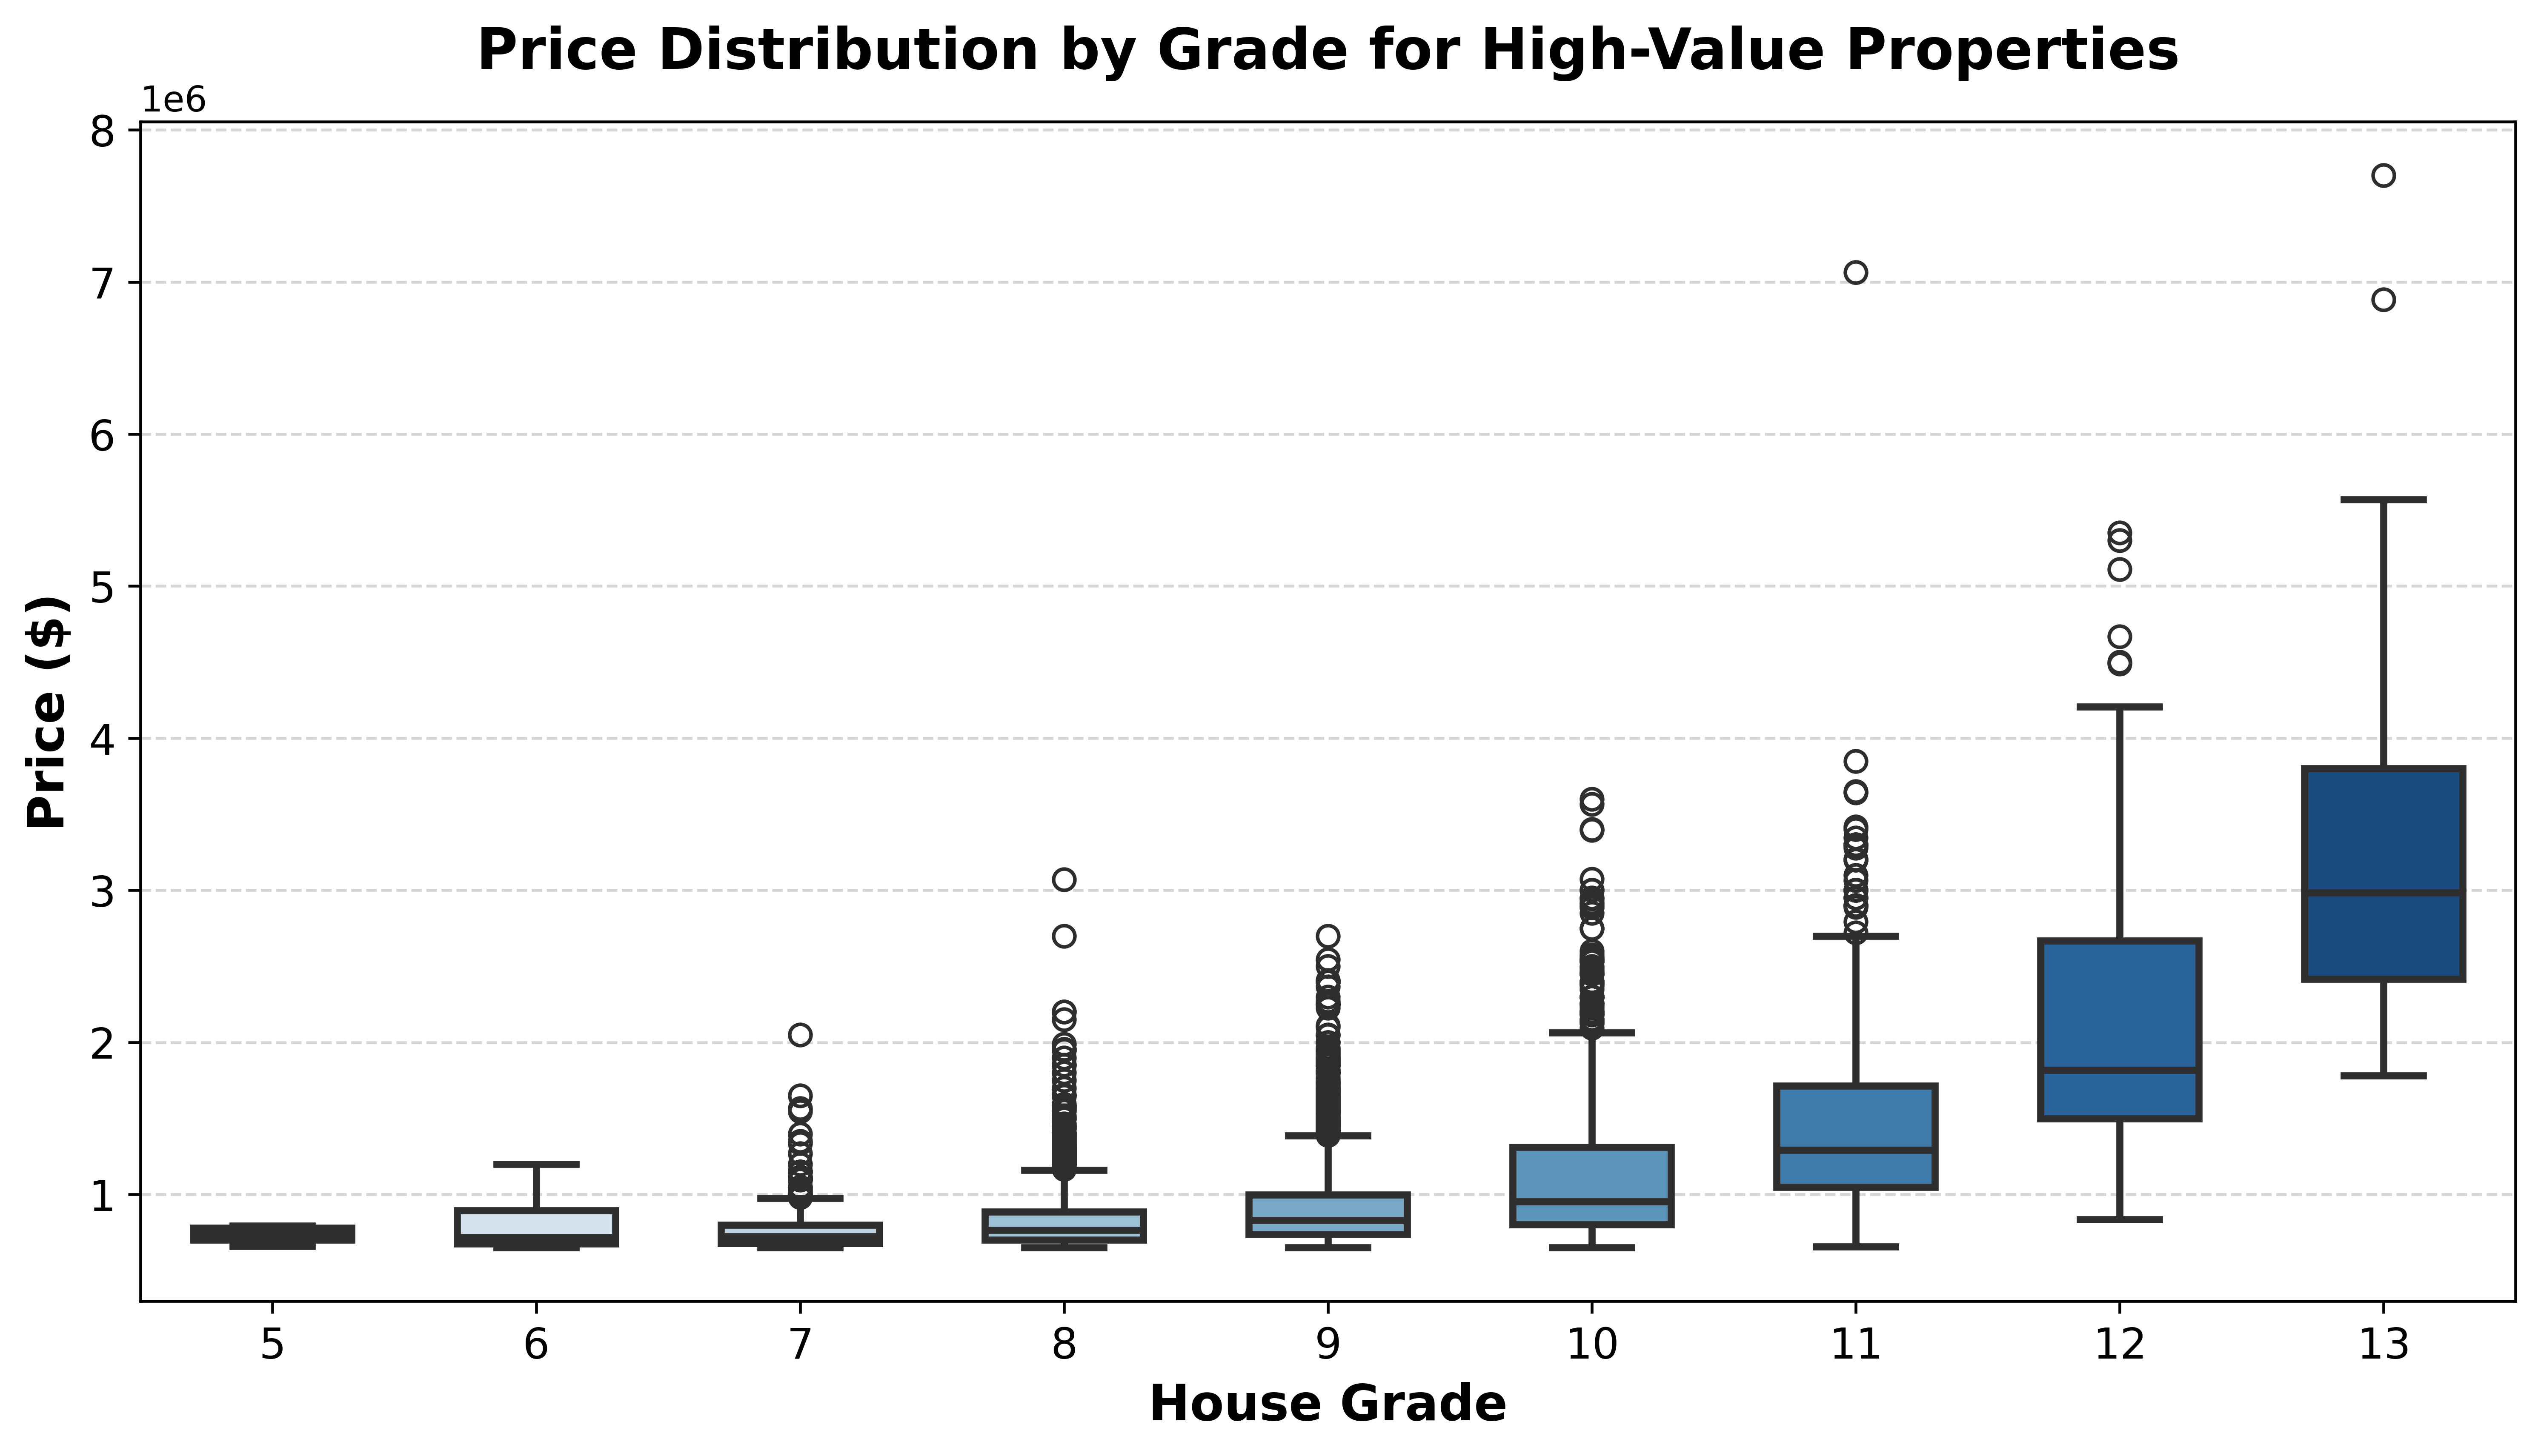

In [ ]:
plt.figure(figsize=(12, 6))

# stylish color palette with enhanced visibility
sns.boxplot(
    x='grade', 
    y='price', 
    data=high_value_properties, 
    palette="Blues",  
    linewidth=2, 
    width=0.6 
)

plt.title('Price Distribution by Grade for High-Value Properties', fontsize=16, fontweight="bold", pad=15)
plt.xlabel("House Grade", fontsize=14, fontweight="bold")
plt.ylabel("Price ($)", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### House prices with/without waterfront 

C:\Users\ZhouZhou\AppData\Local\Temp\ipykernel_488\1982616666.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


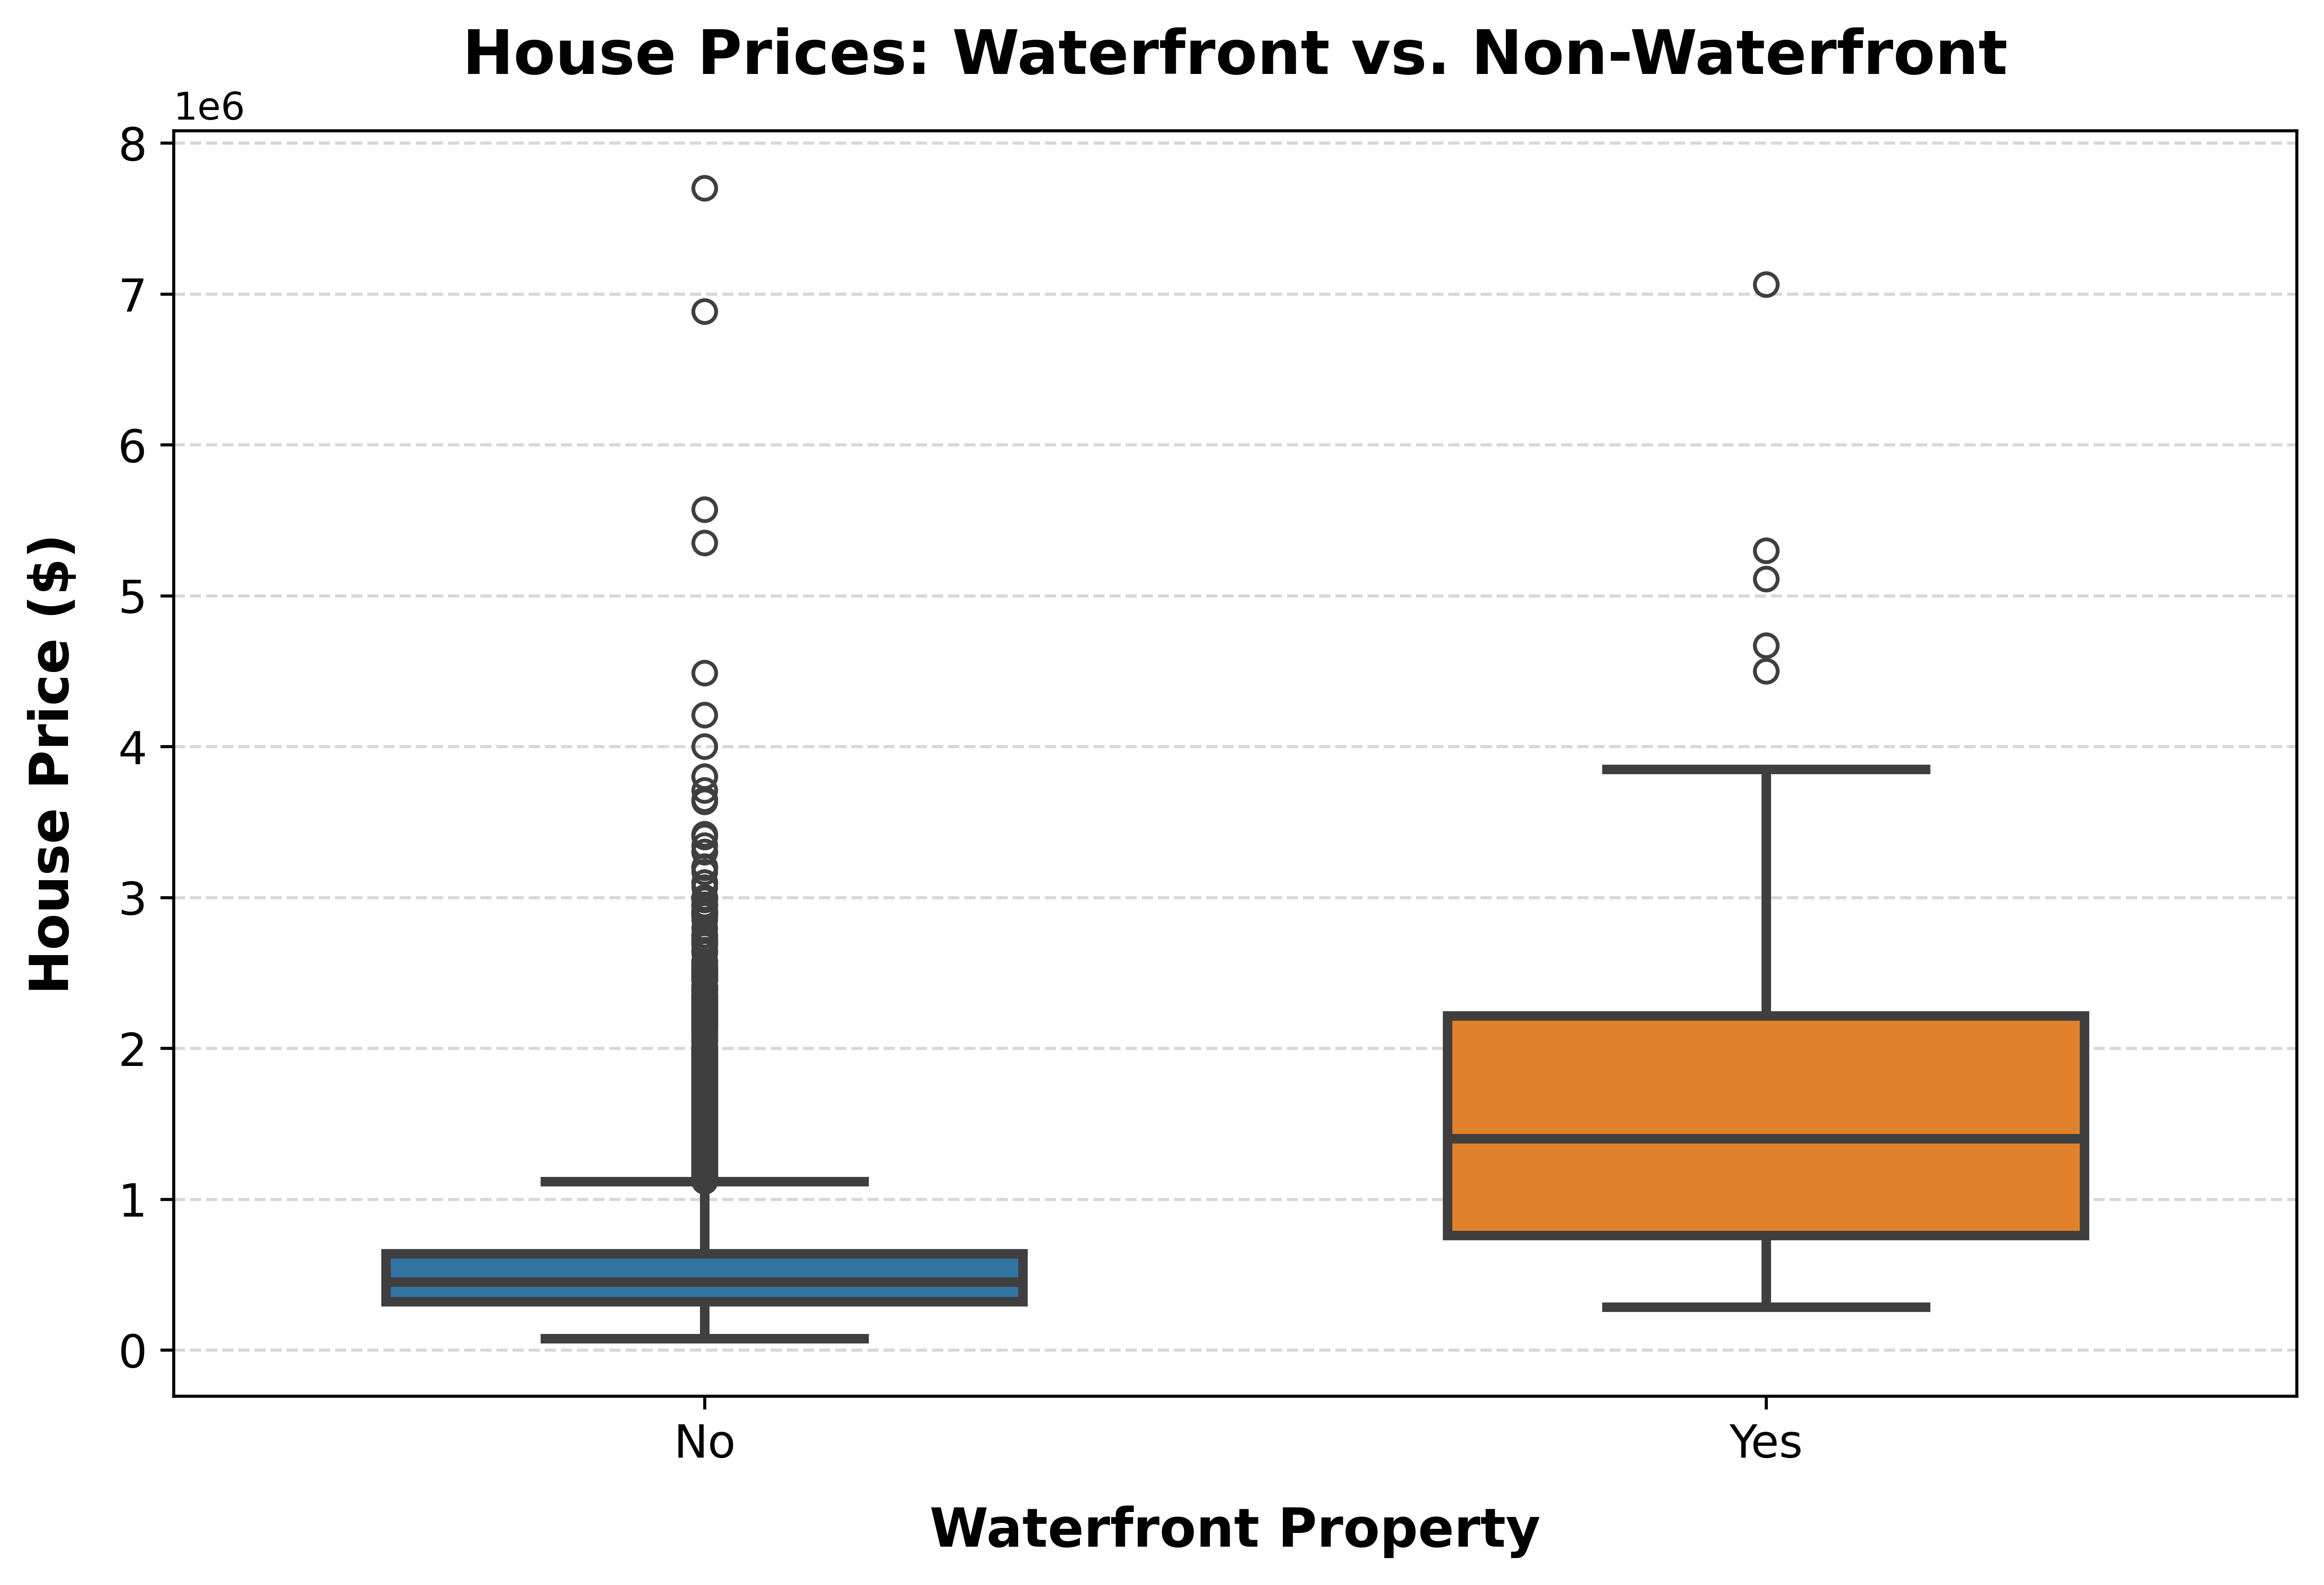

In [ ]:
plt.figure(figsize=(10, 6))

# custom color for boxplots with edge color
sns.boxplot(
    x=df["waterfront"], 
    y=df["price"], 
    palette=["#1f77b4", "#ff7f0e"],  
    linewidth=2.5,  
    width=0.6 
)

# labels and title
plt.xlabel("Waterfront Property", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("House Price ($)", fontsize=14, fontweight="bold", labelpad=10)
plt.title("House Prices: Waterfront vs. Non-Waterfront", fontsize=16, fontweight="bold", pad=15)

# customize grid and layout
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks([0, 1], ["No", "Yes"], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Price vs Square Footage

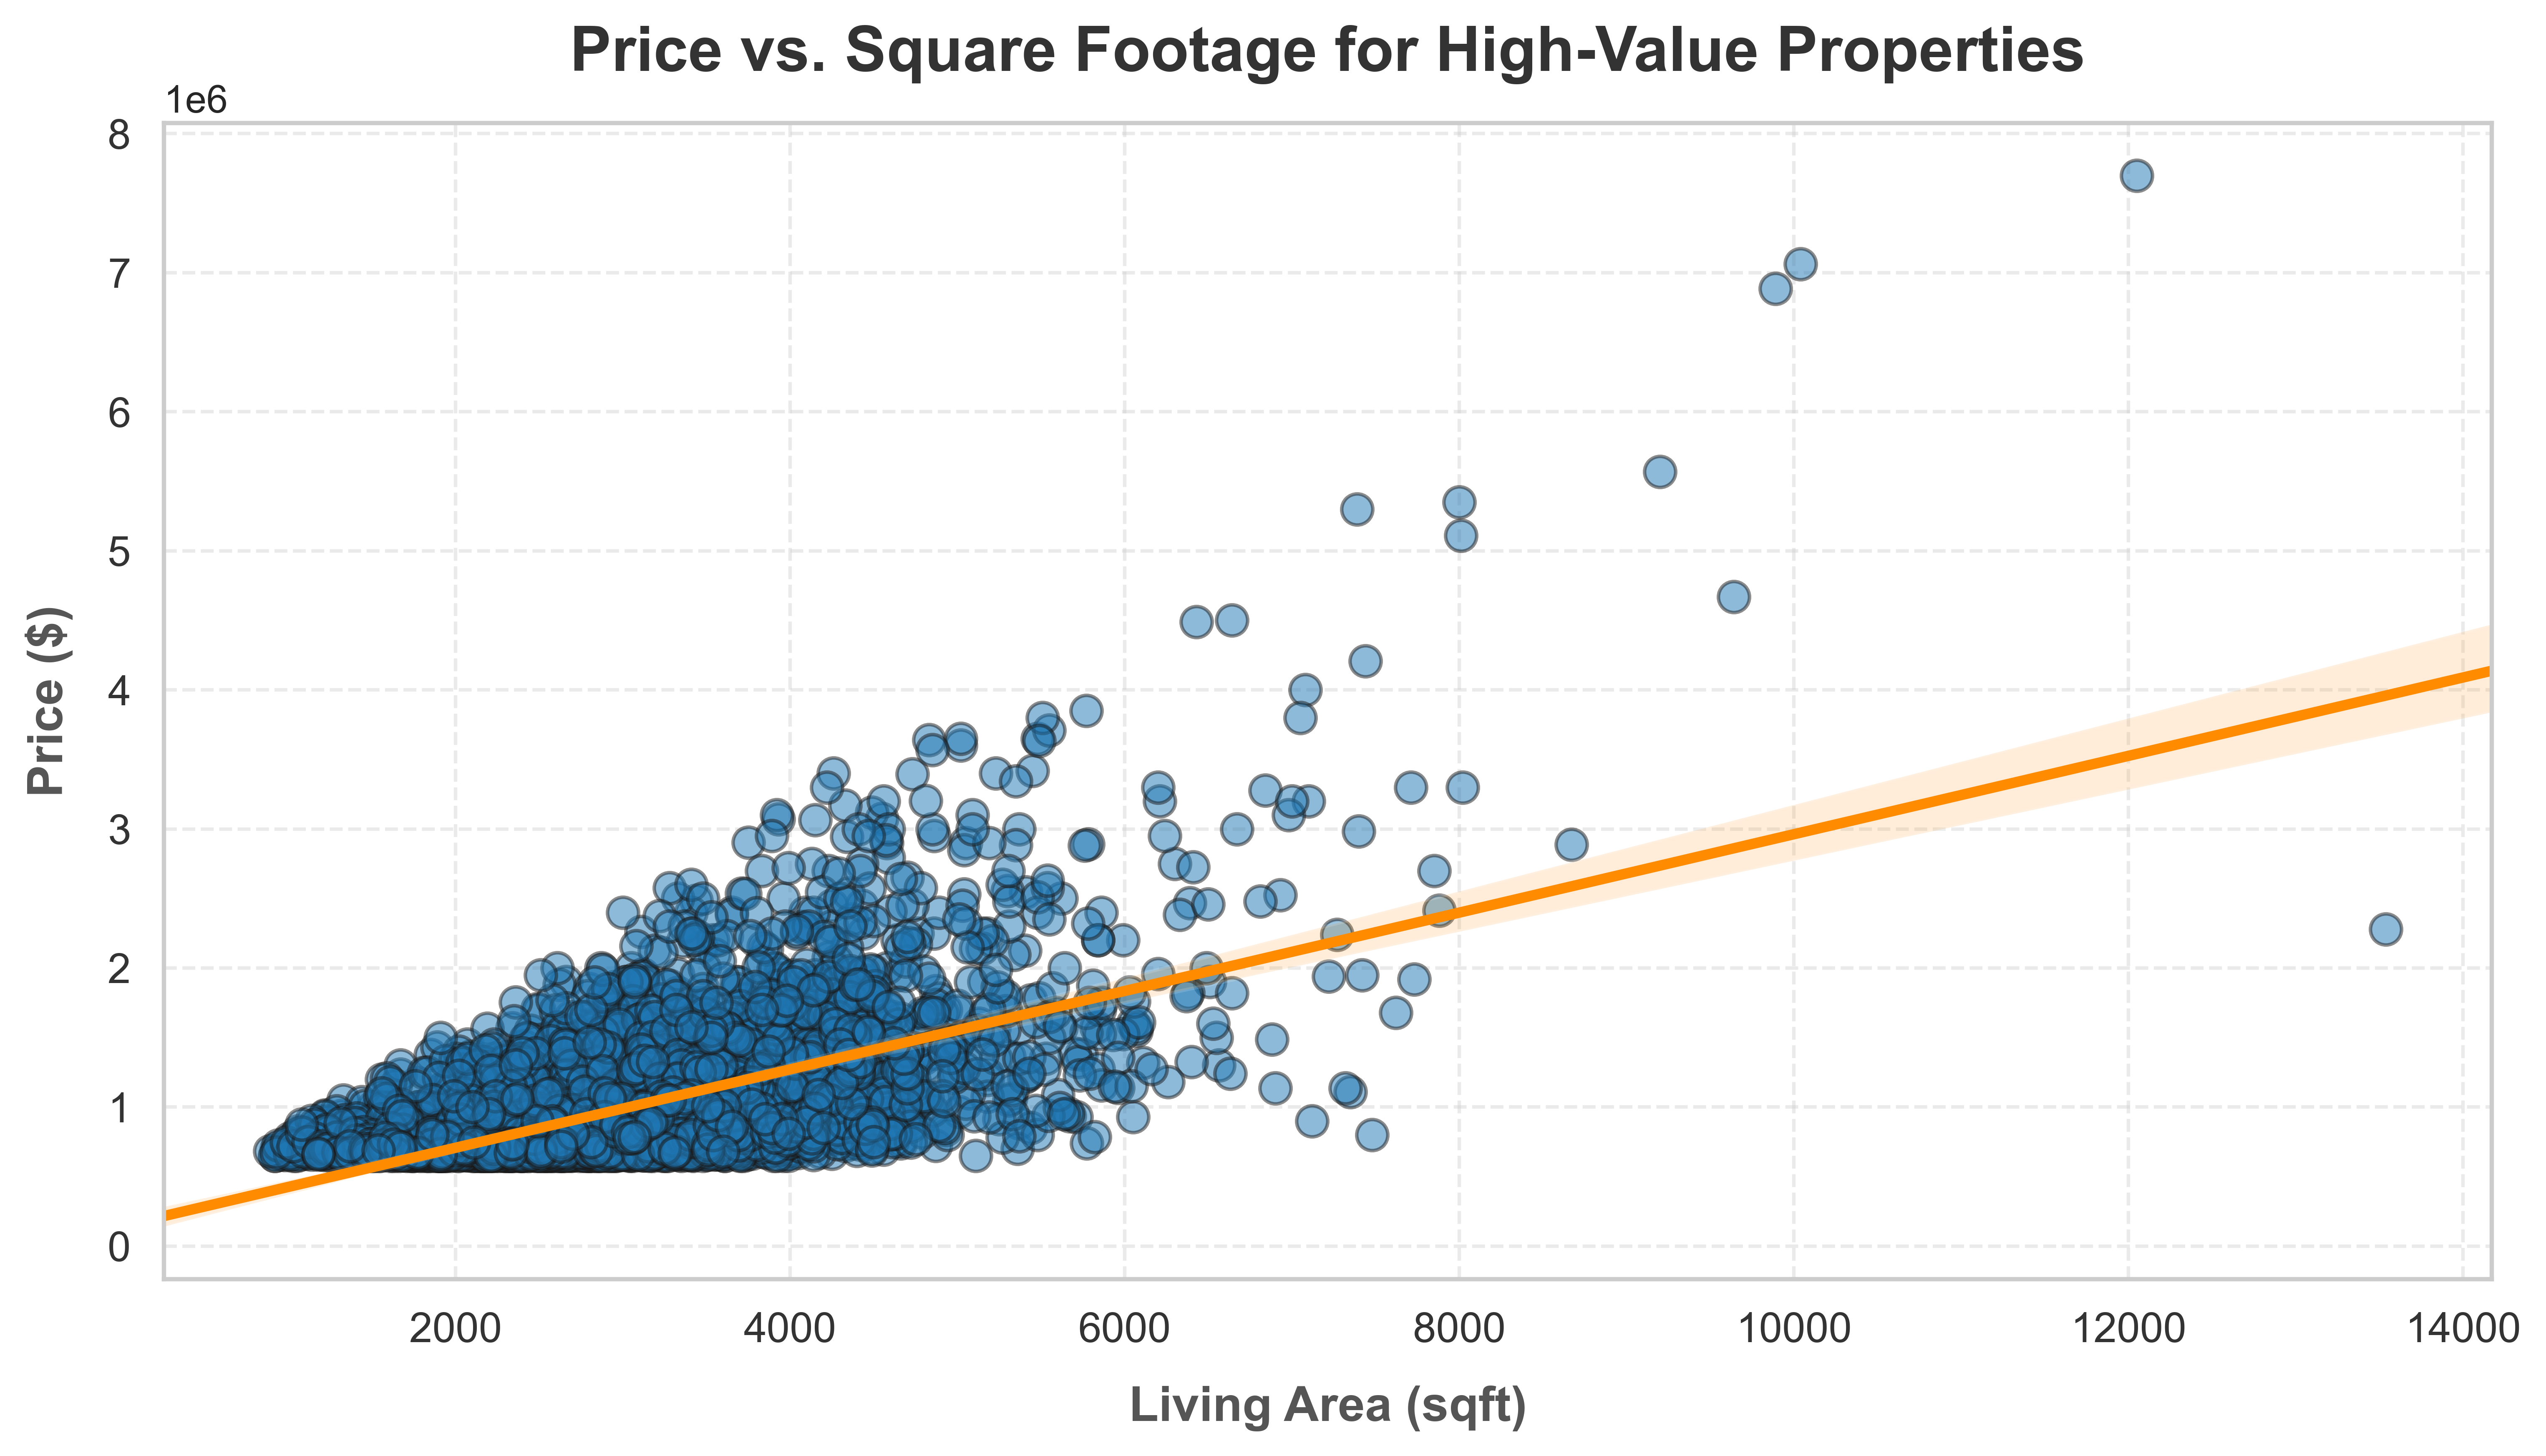

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

sns.regplot(
    x='sqft_living', 
    y='price', 
    data=high_value_properties, 
    scatter_kws={'alpha': 0.5, 'edgecolor': 'k', 'color': '#1f77b4', 's': 80},  # Blue points with black edges
    line_kws={'color': '#ff8c00', 'linewidth': 3},  # orange regression line
    ci=95,  # 95% confidence interval
    truncate=False  # extend the regression line across the data range
)

plt.title('Price vs. Square Footage for High-Value Properties', fontsize=18, fontweight="bold", pad=15, color="#333")
plt.xlabel("Living Area (sqft)", fontsize=14, fontweight="bold", labelpad=10, color="#555")
plt.ylabel("Price ($)", fontsize=14, fontweight="bold", labelpad=10, color="#555")
plt.grid(True, linestyle="--", alpha=0.4)

# customized ticks for better readability
plt.xticks(fontsize=12, color="#333")
plt.yticks(fontsize=12, color="#333")

plt.show()